## CreditCard Sampling DeepLearning

### Importing the dependency Libraries

In [6]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt
import seaborn as sns

np.random.seed(2)

### Fixing the Figure size and Figure Style

In [7]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 120

#Plot type

plt.style.use('ggplot')

In [8]:
data = pd.read_csv('./creditcard.csv')

## Data Exploration

In [9]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [10]:
len(data)

284807

In [11]:
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [12]:
print('Number of fraudulent transactions = %d or %d per 100,000 transactions in the dataset'
      %(len(data[data.Class==1]), len(data[data.Class==1])/len(data)*100000))

Number of fraudulent transactions = 492 or 172 per 100,000 transactions in the dataset


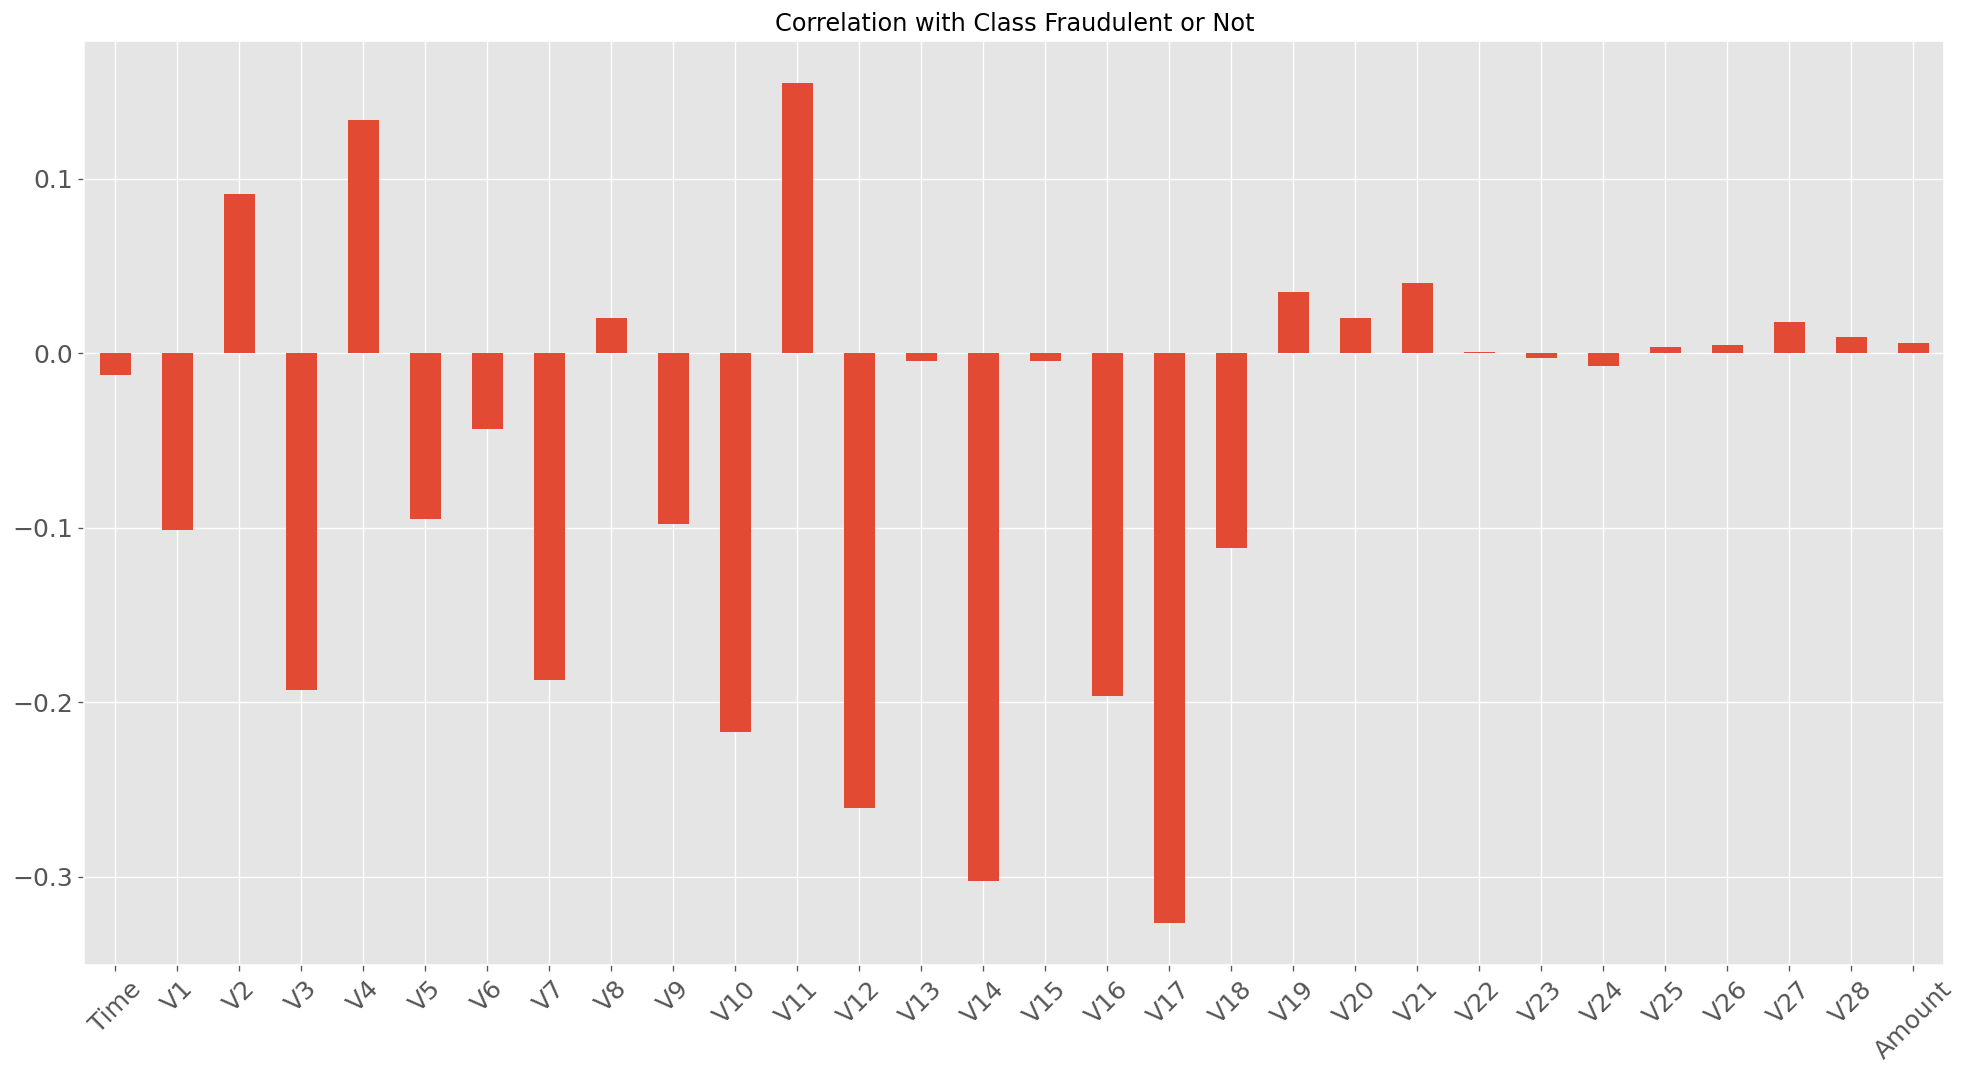

In [13]:
## Linear Correlation with Response Variable (Note: Models like RandomForest are not linear)
data2 = data.drop(columns = ['Class'])   # drop non numerical columns
data2.corrwith(data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class Fraudulent or Not", fontsize = 15,
        rot = 45, grid = True)
plt.show()

## Pre-Processing of Data

In [14]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))  # Normalize 'Amount' in [-1,+1] range
data = data.drop(['Amount'],axis=1)

In [15]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  normalizedAmount  
0 -0.189115  0.133558 -0.021053      0          0.244964  
1  0.125895 -0.008983  0.014724      0         -0.342475  
2 -0.139097 -0.055353 -0.059752      0          1.160686  
3 -0.221929  0.062723  0.061458      0          0.140534  
4  0.502292  0.219422  0.215153      0         -0.073403  

[5 rows x 31 columns]

In [16]:
data = data.drop(['Time'],axis=1)
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Class  normalizedAmount  
0  0.128539 -0.189115  0.133558 -0.021053      0          0.244964  
1  0.167170  0.125895 -0.008983  0.014724      0         -0.342475  
2 -0.327642 -0.139097 -0.055353 -0.059752      0          1.160686  
3  0.647376 -0.221929  0.062723  0.061458      0          0.140534  
4 -0.206010  0.502292  0.219422  0.215153      0         -0.073403  

[5 rows x 30 columns]

In [17]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']  # Response variable determining if fraudulent or not

In [18]:
y.head()

Class
0      0
1      0
2      0
3      0
4      0

#### Check for Null or not Null and Sum the value

In [19]:
X.isnull().sum()

V1                  0
V2                  0
V3                  0
V4                  0
V5                  0
V6                  0
V7                  0
V8                  0
V9                  0
V10                 0
V11                 0
V12                 0
V13                 0
V14                 0
V15                 0
V16                 0
V17                 0
V18                 0
V19                 0
V20                 0
V21                 0
V22                 0
V23                 0
V24                 0
V25                 0
V26                 0
V27                 0
V28                 0
normalizedAmount    0
dtype: int64

### Creating heatmap on DataFrame for values with Null 


<Axes: >

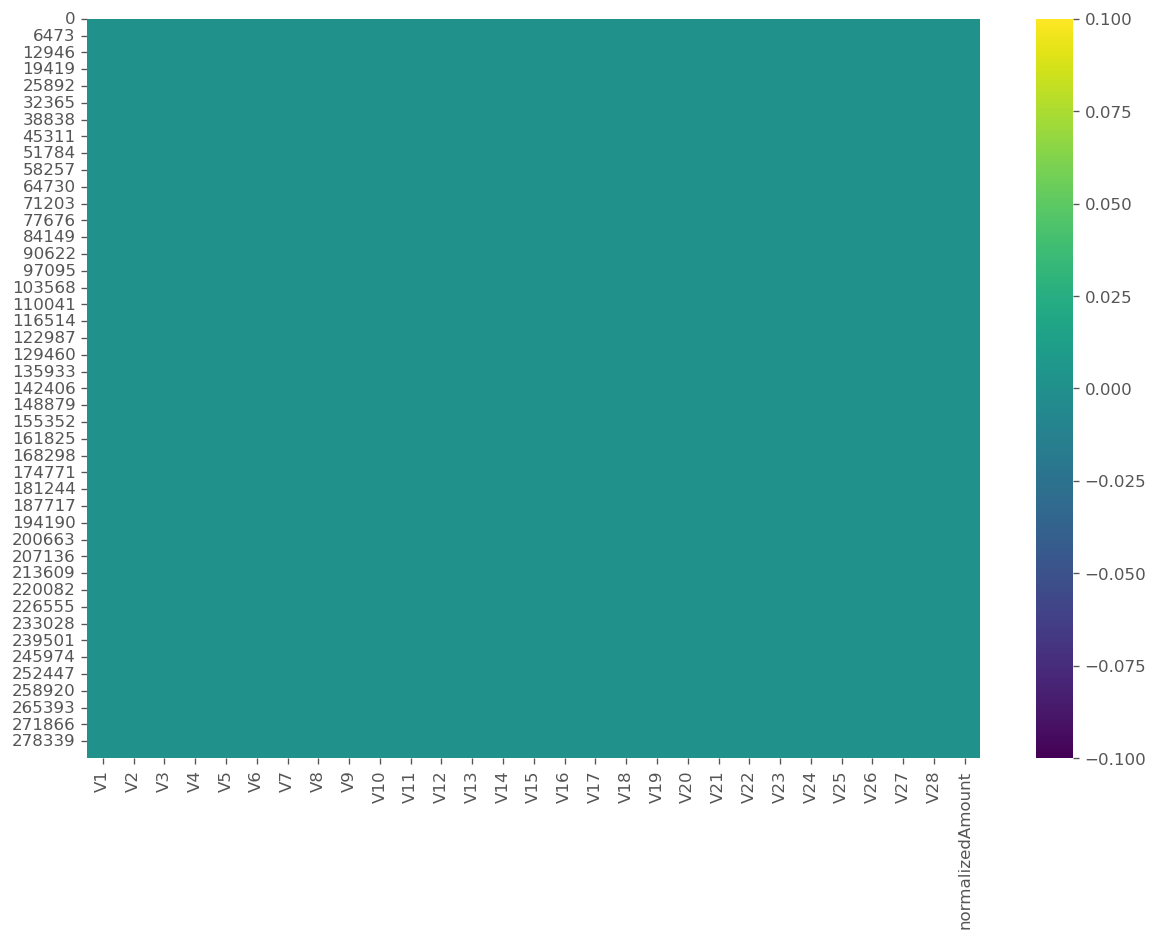

In [20]:
sns.heatmap(X.isnull(), cmap = 'viridis', cbar = True)

### corr() is used to find the pairwise correlation of all columns in the dataframe

<Axes: >

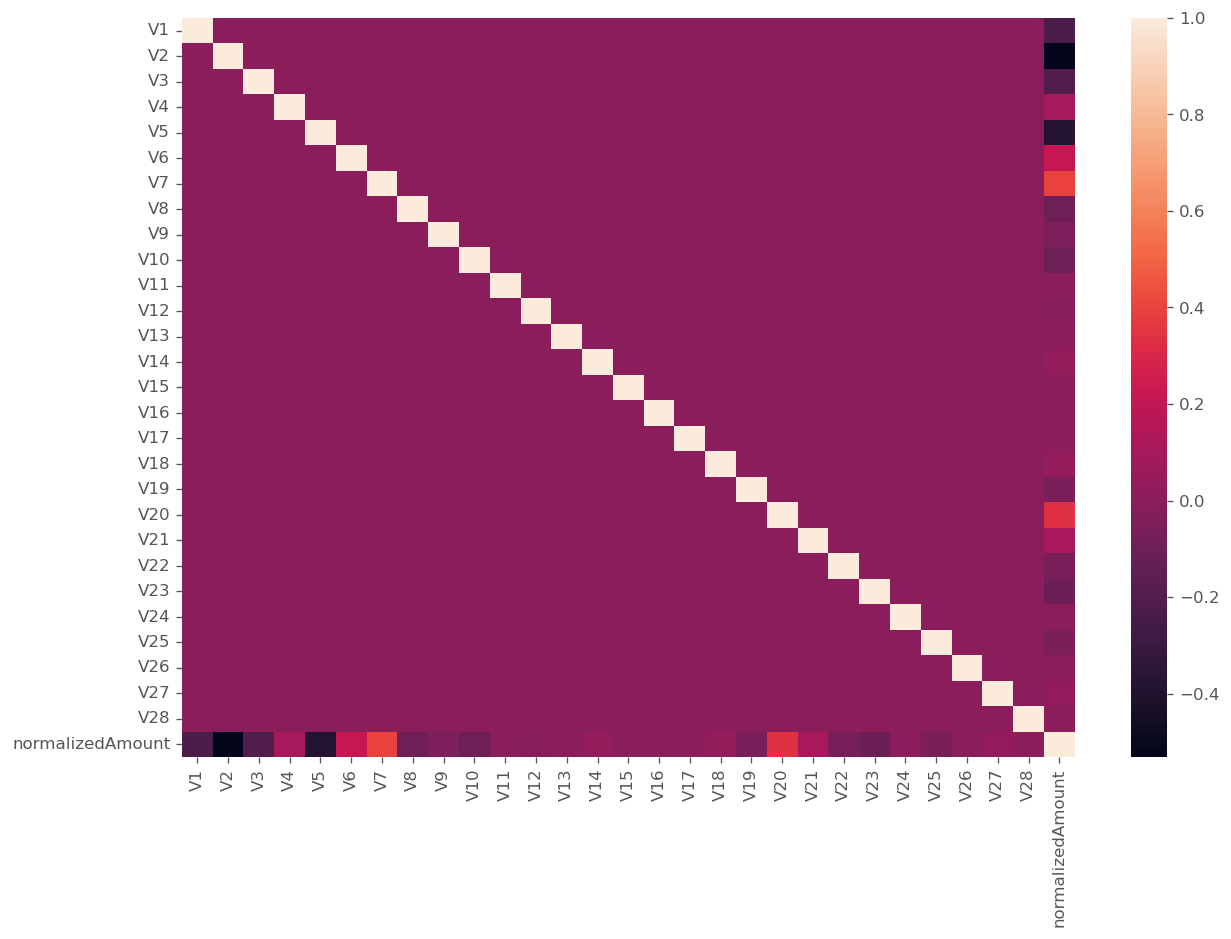

In [21]:
corrmap=X.corr()
sns.heatmap(corrmap)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [23]:
print(f' X_train.shape:{X_train.shape} X_test.shape:{X_test.shape}')

 X_train.shape:(199364, 29) X_test.shape:(85443, 29)


### Extracting the Features and displaying of Distribution Plots

In [24]:
num_features = X.columns[X.dtypes != 'object']
print(num_features.shape)
num_features

(29,)


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'normalizedAmount'],
      dtype='object')

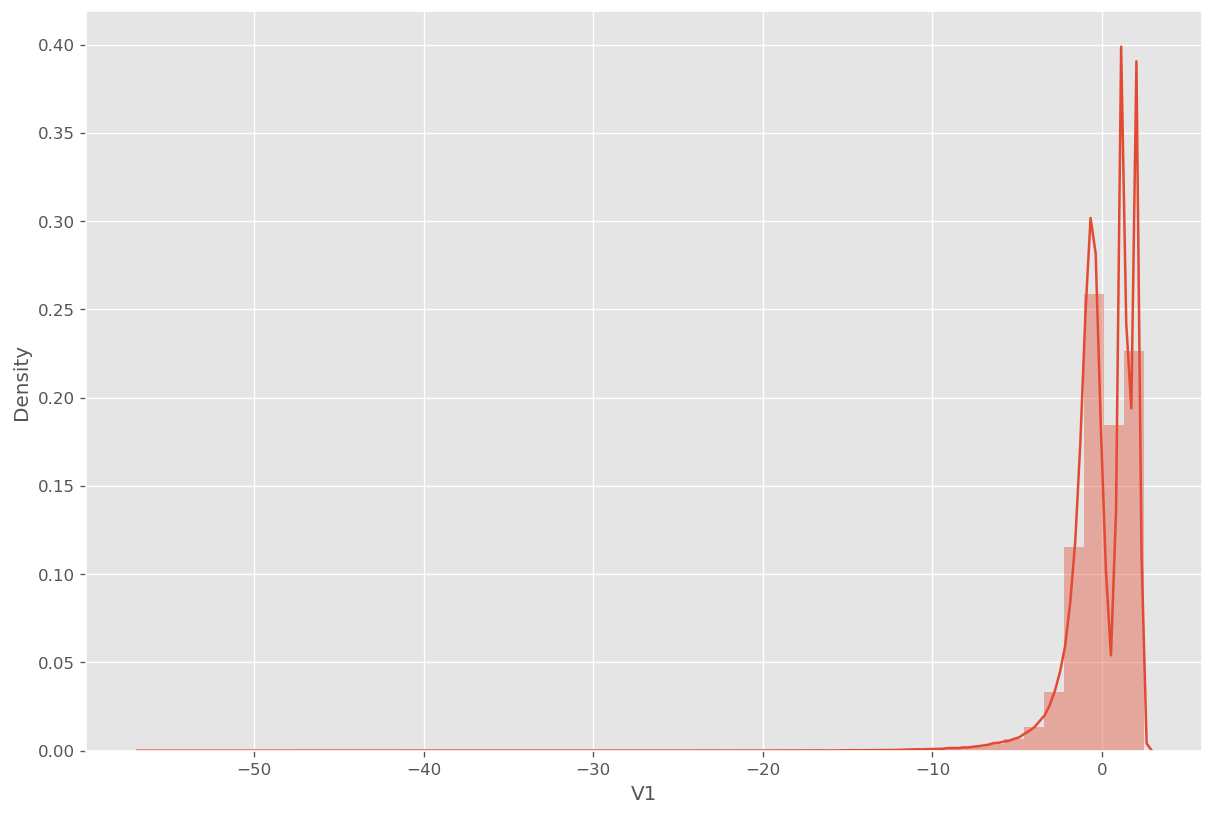

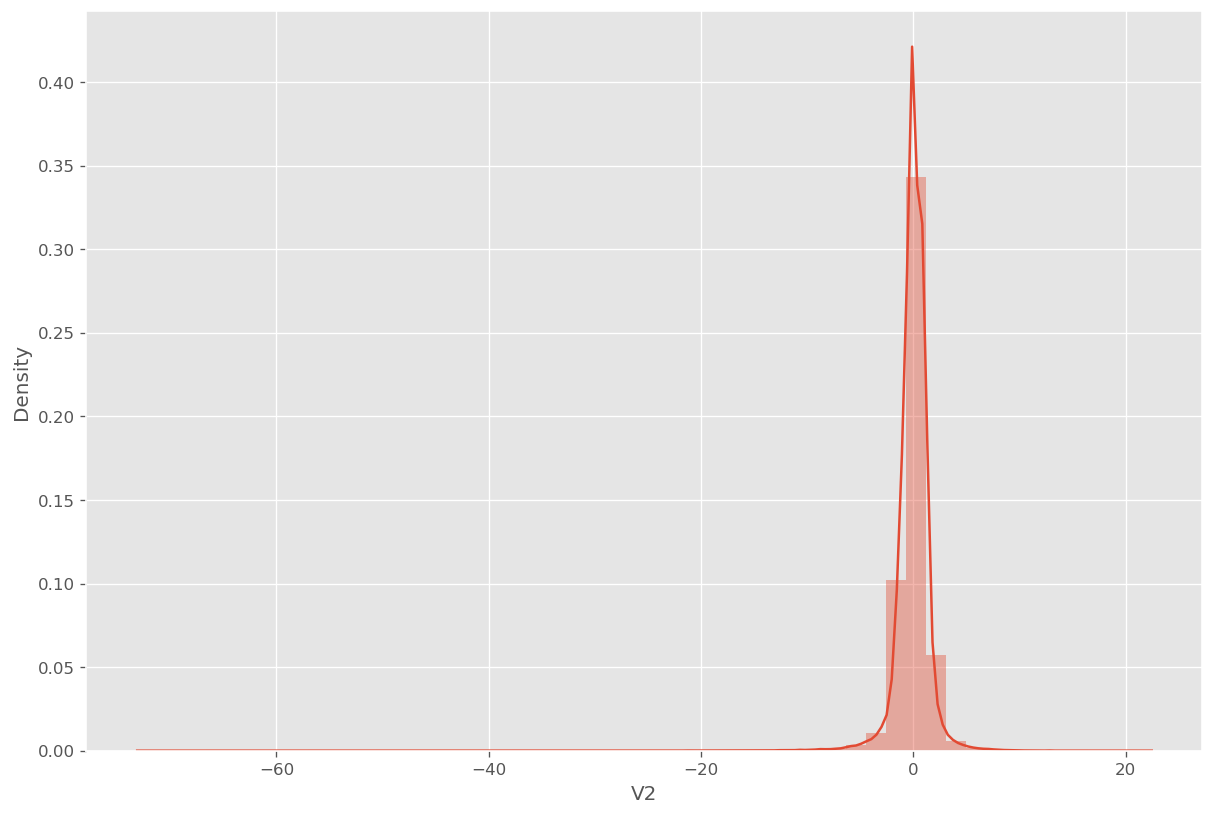

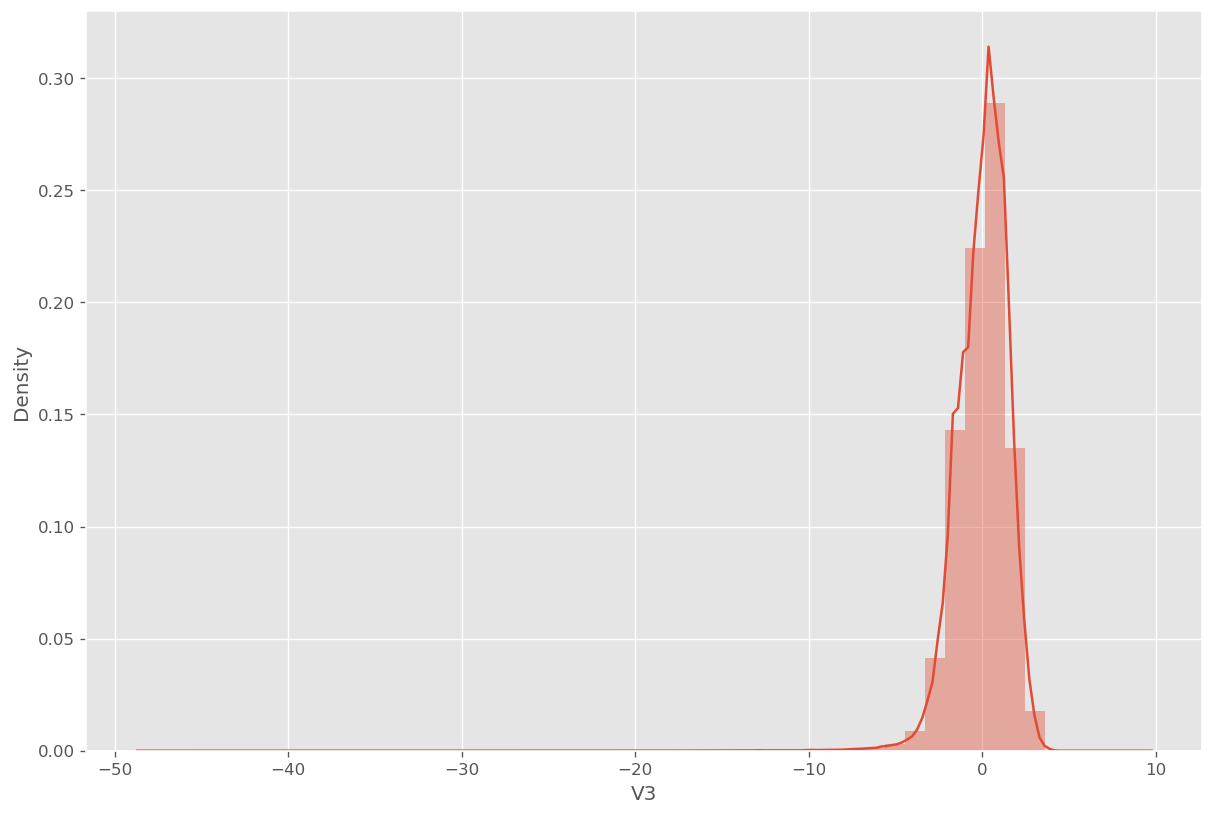

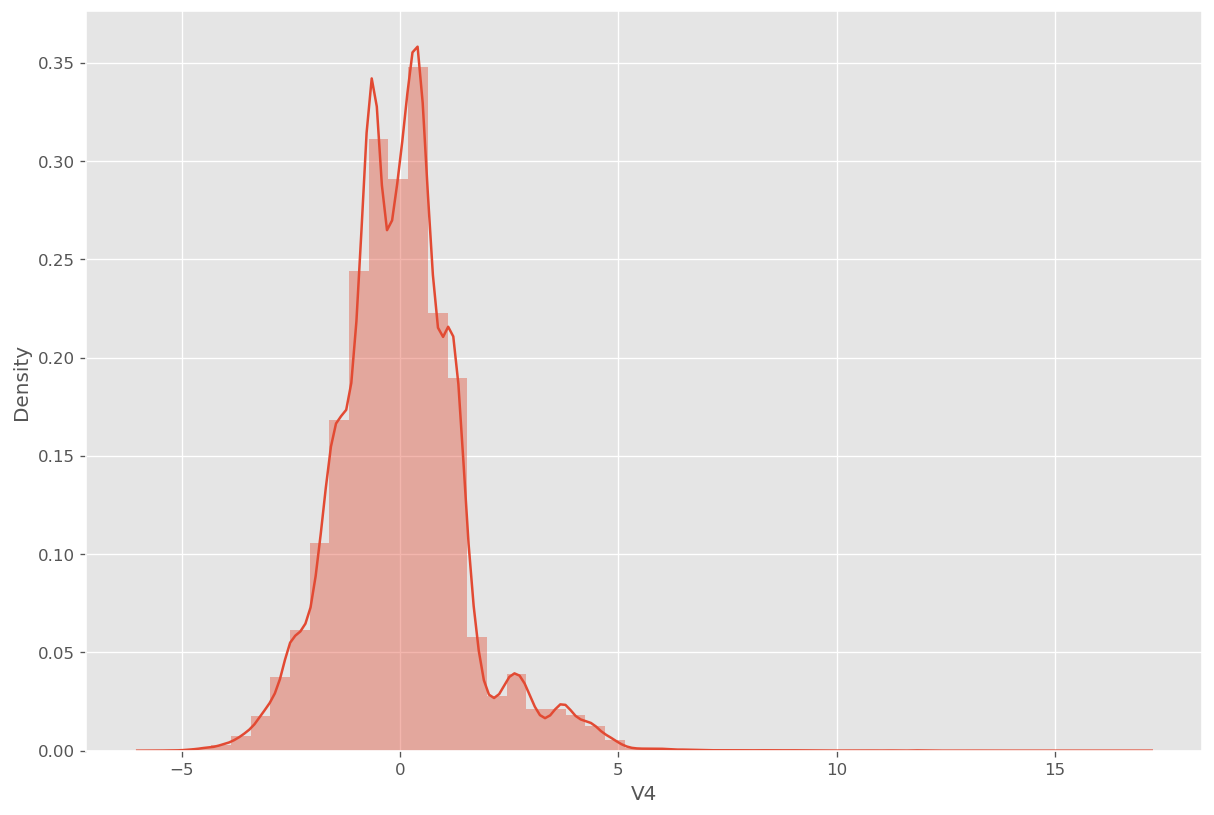

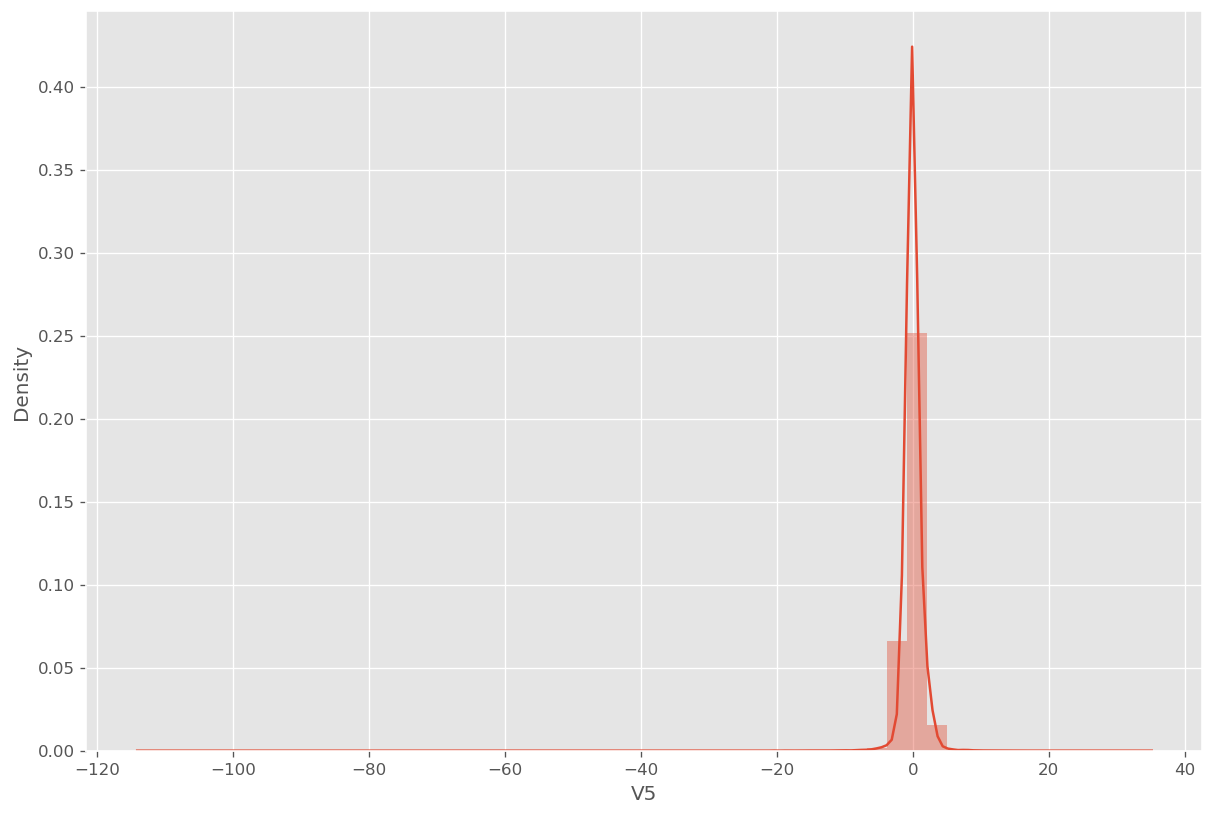

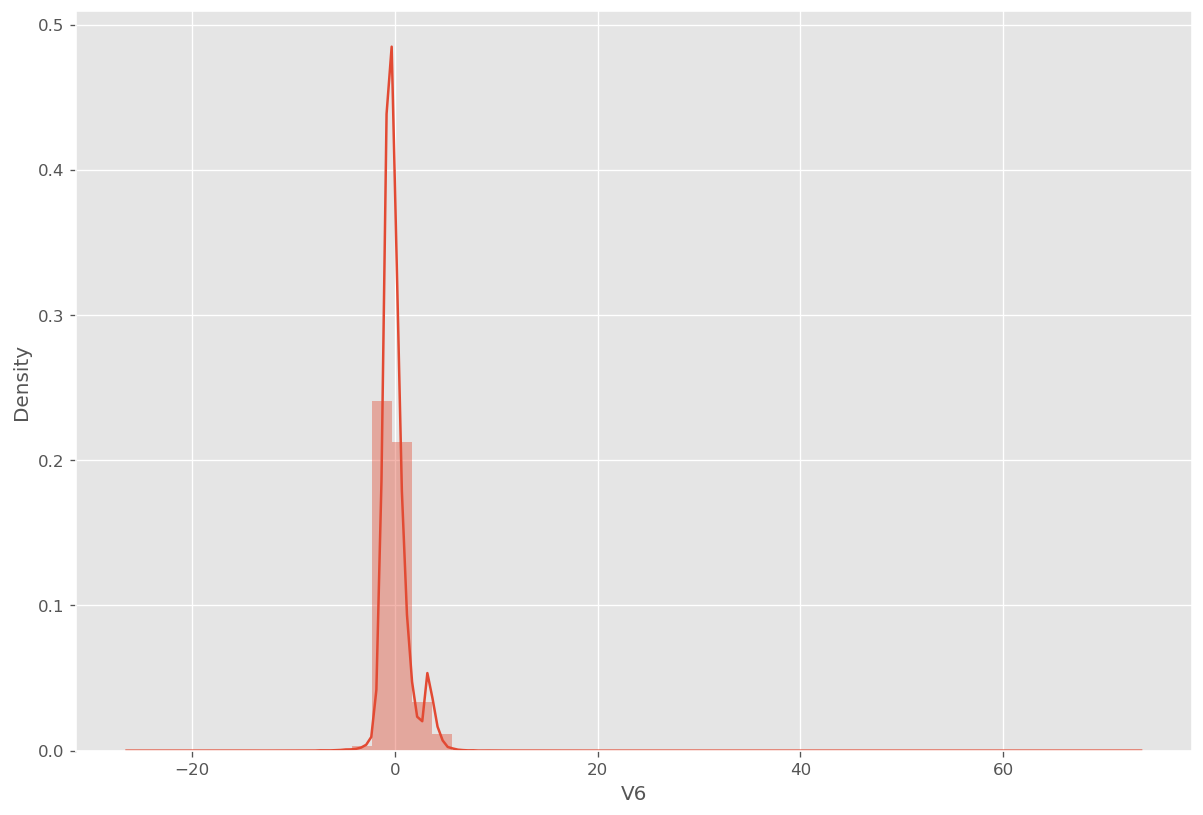

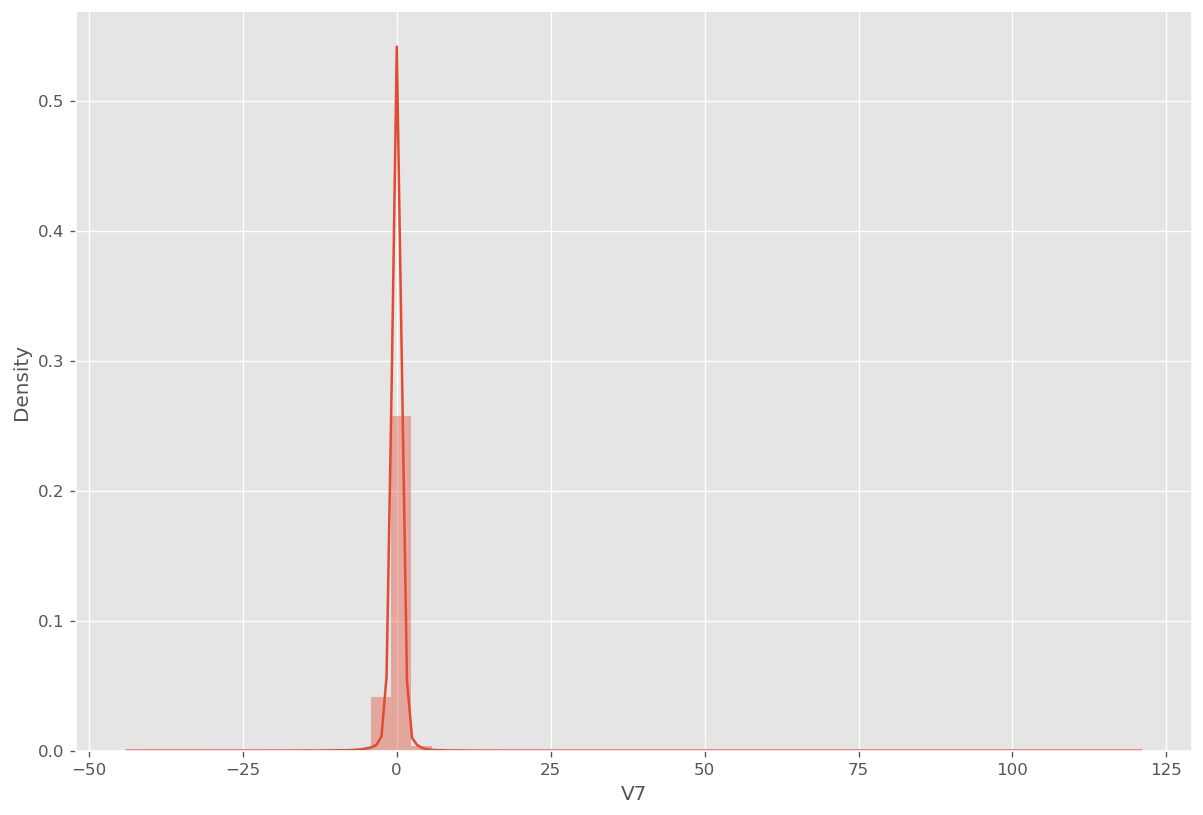

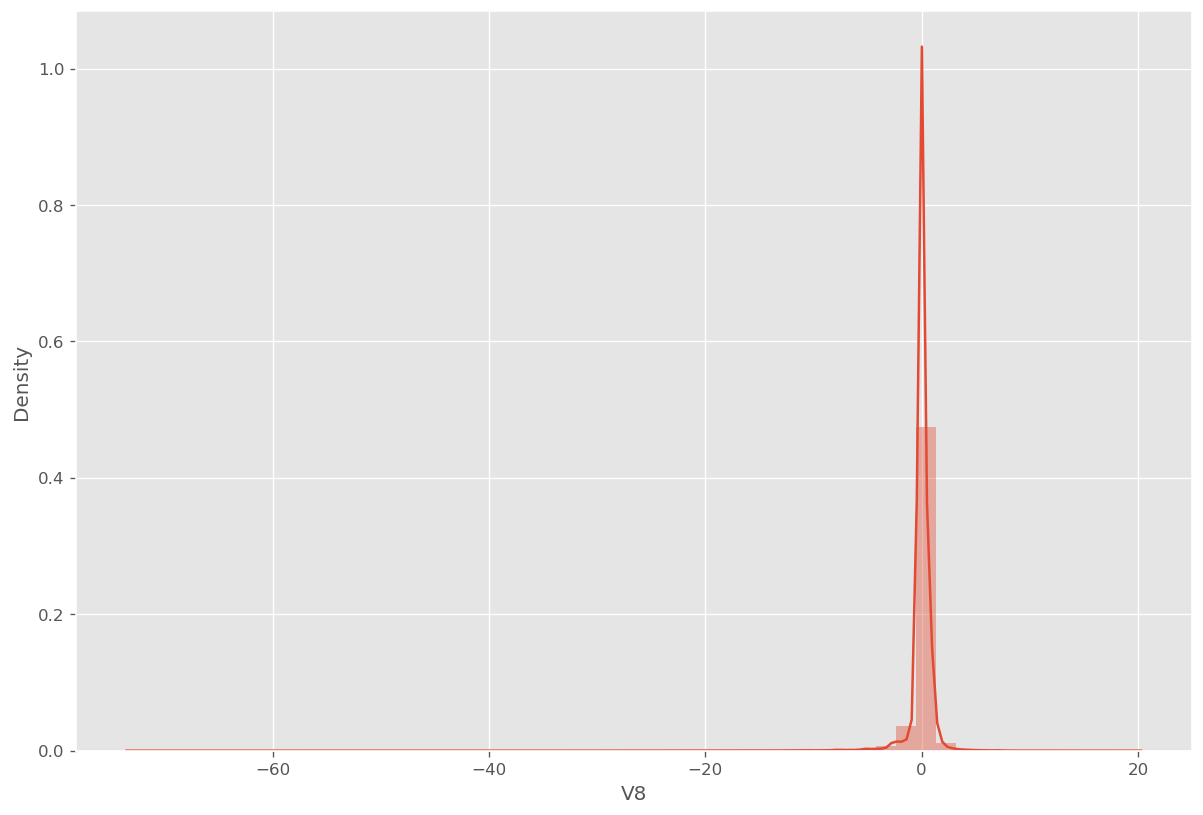

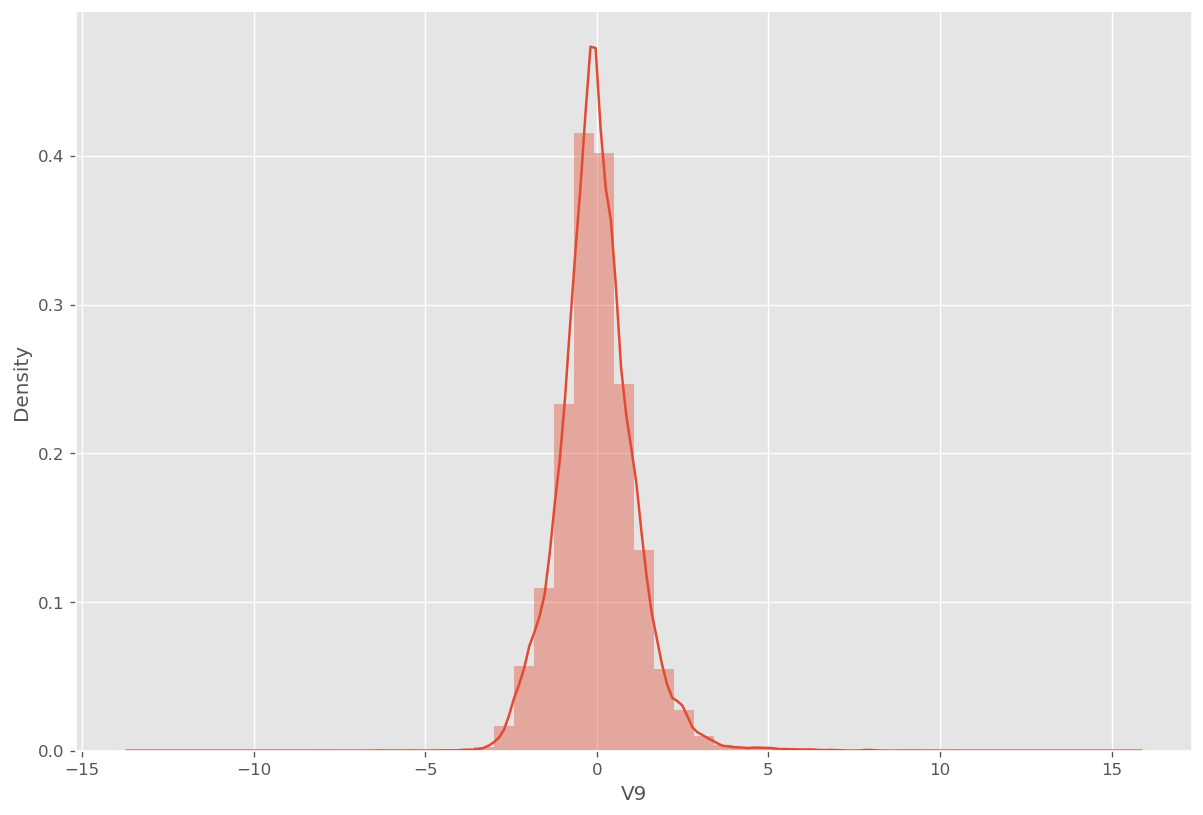

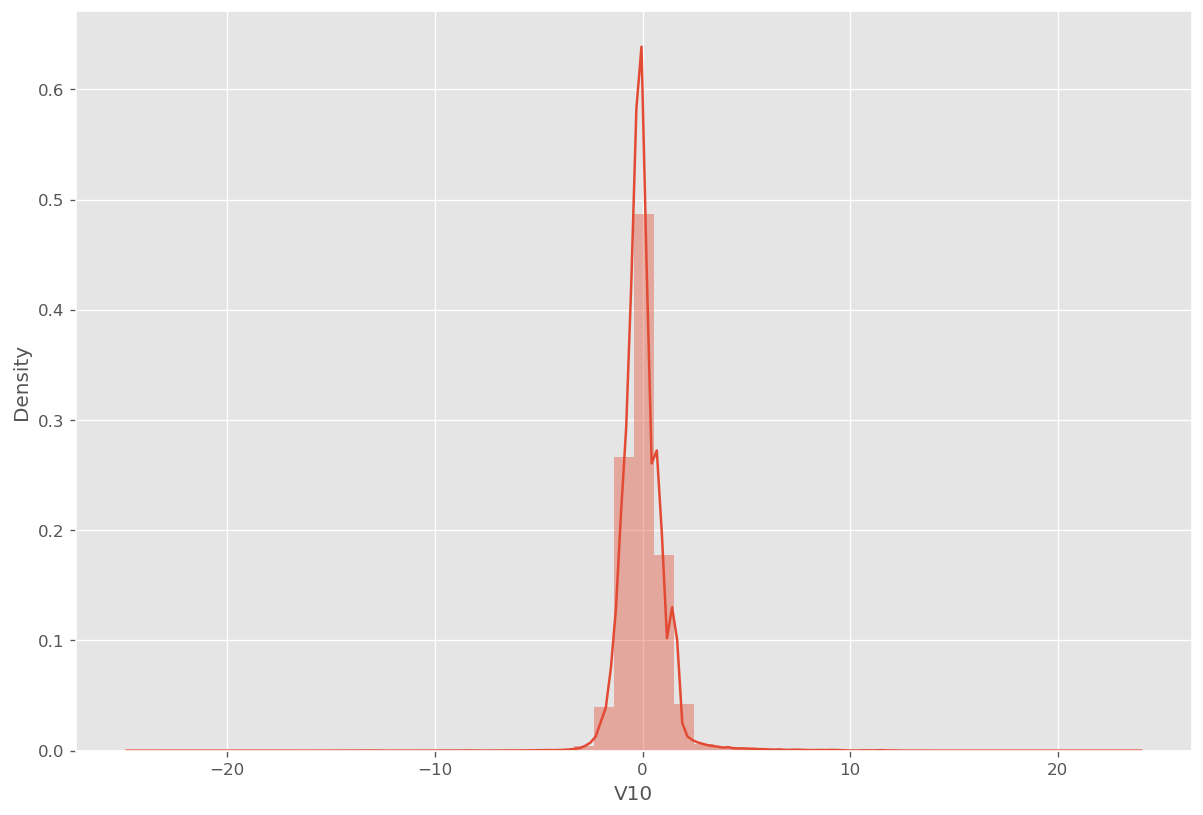

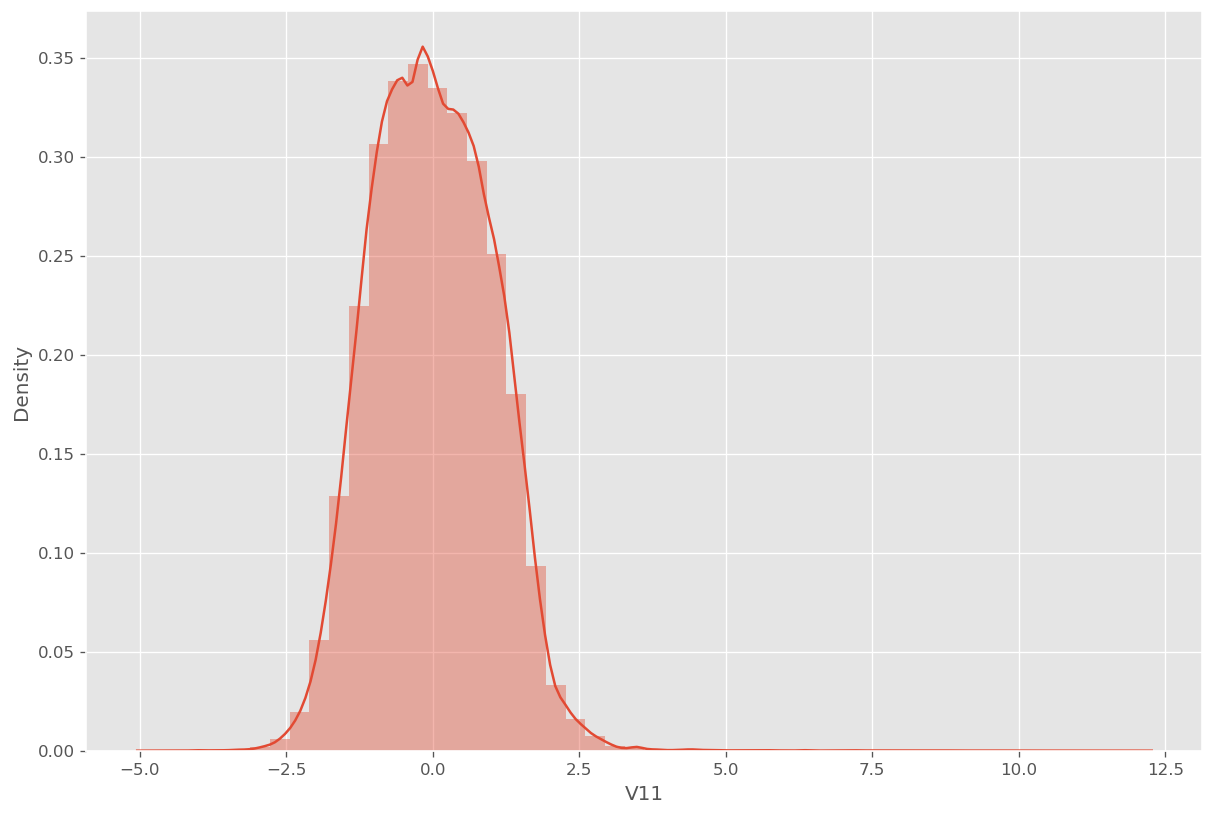

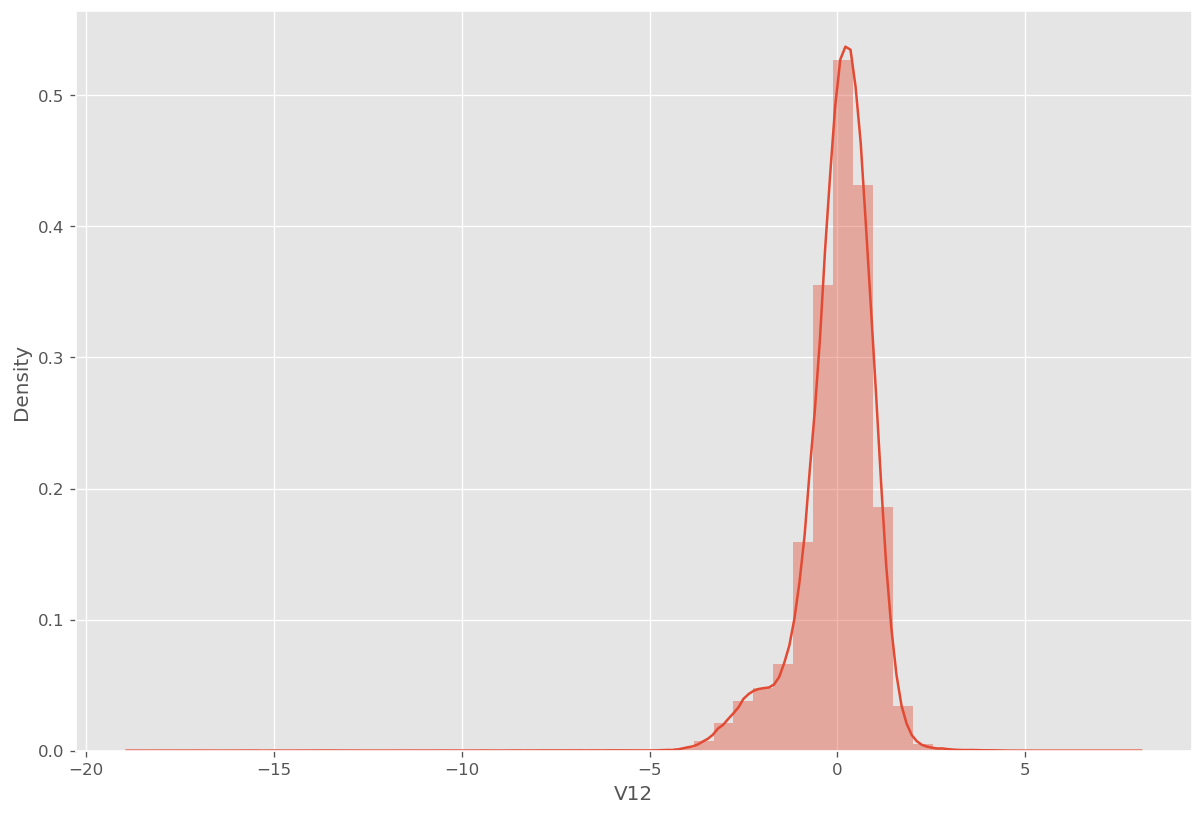

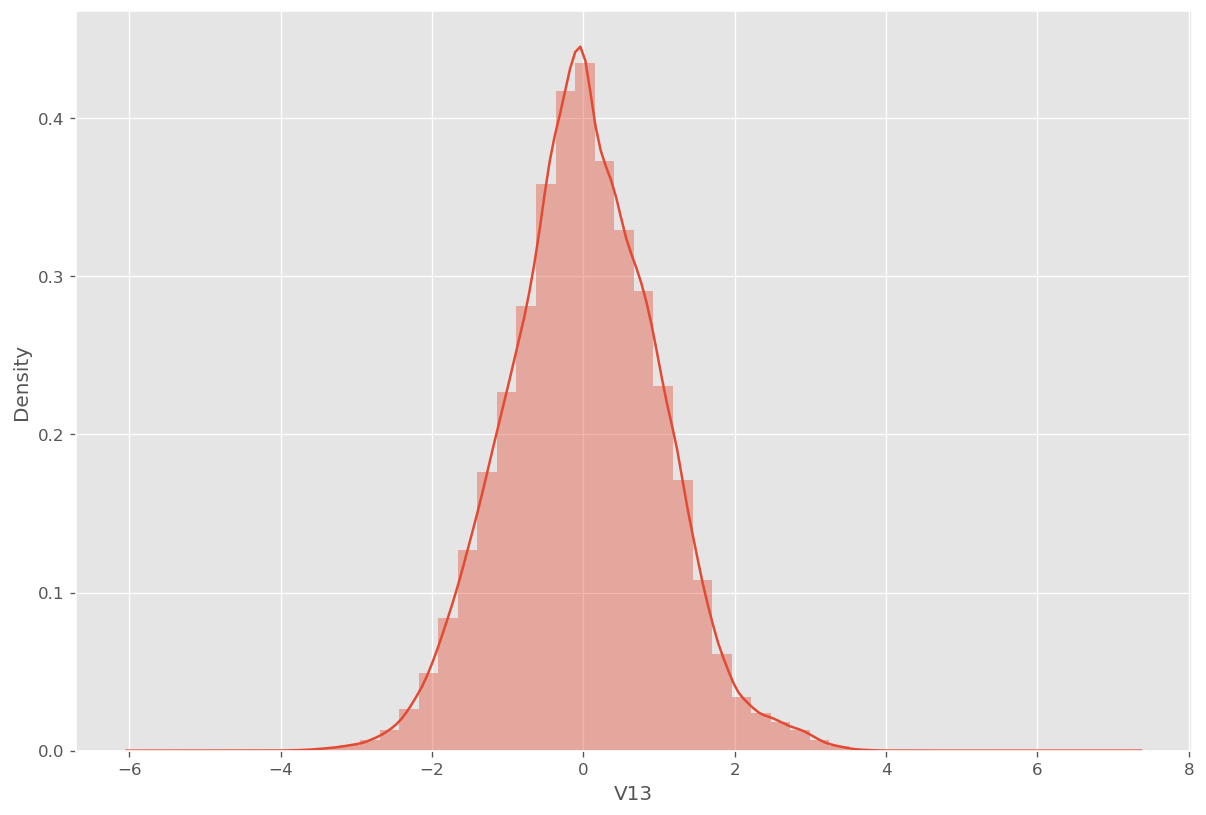

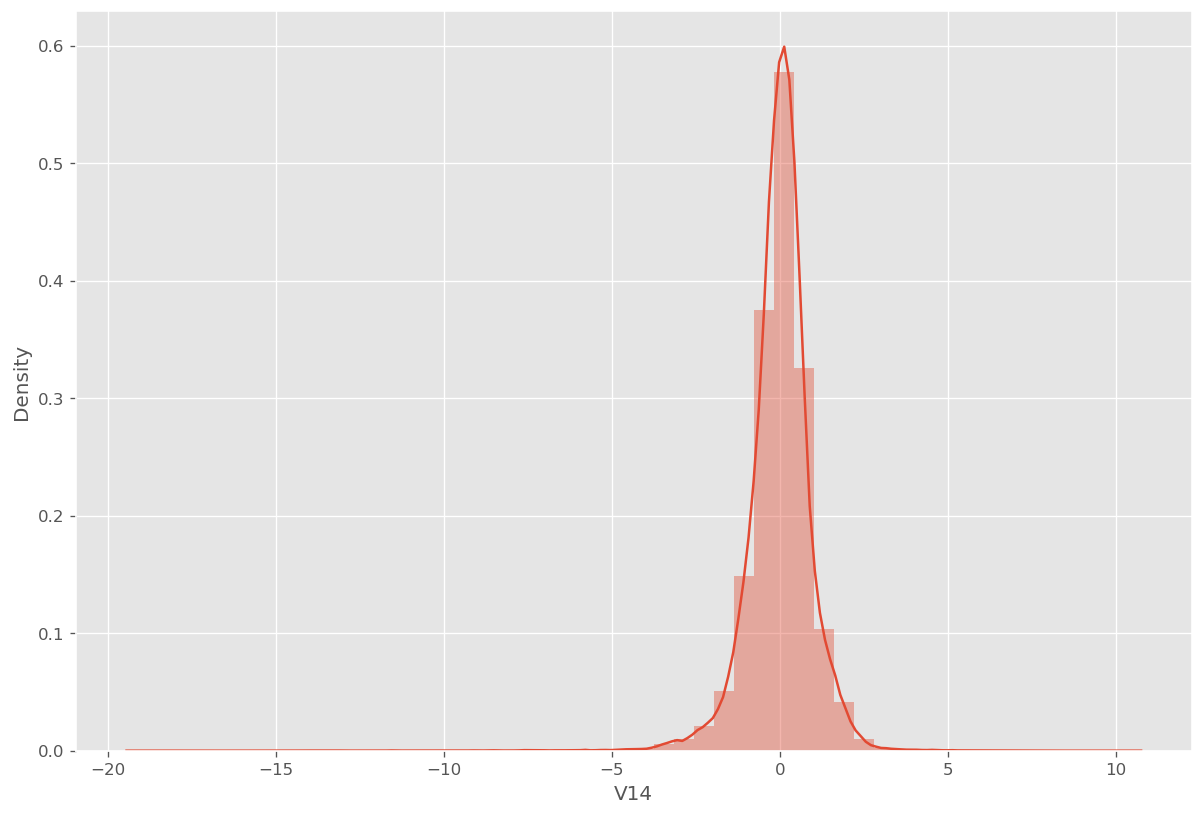

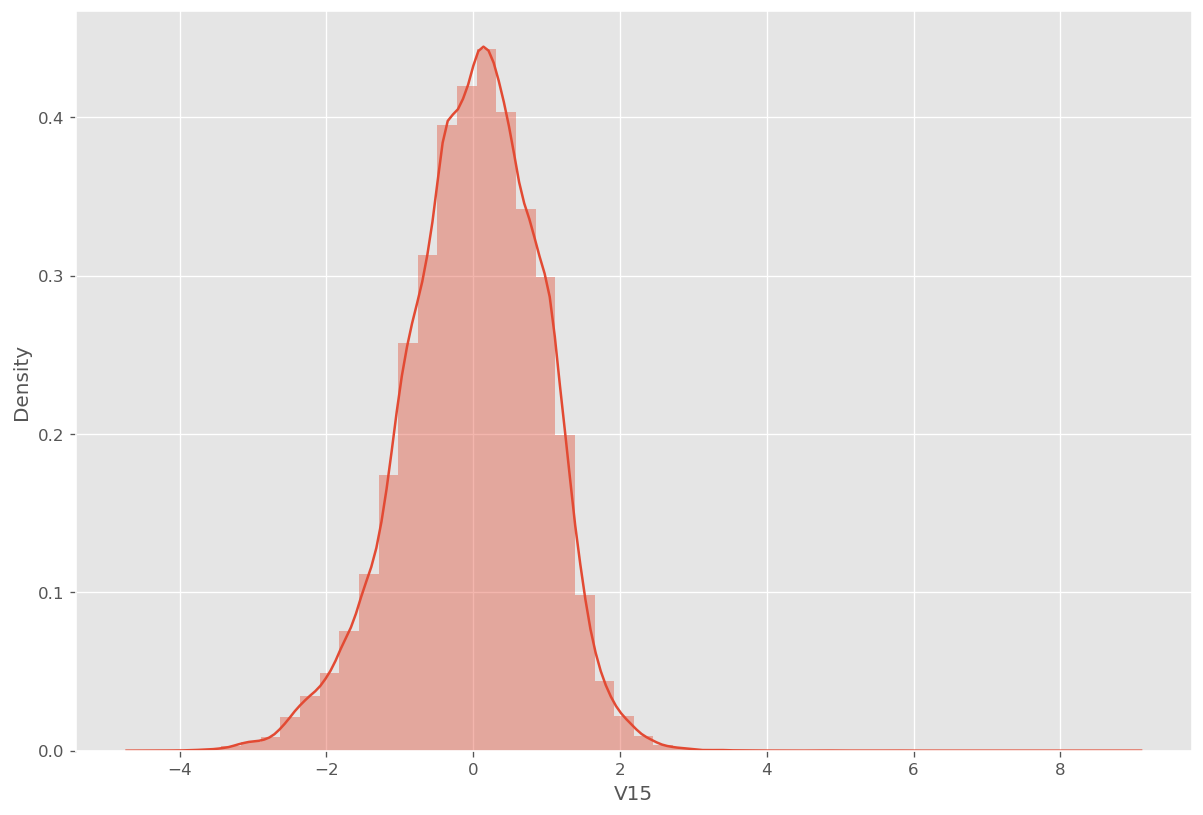

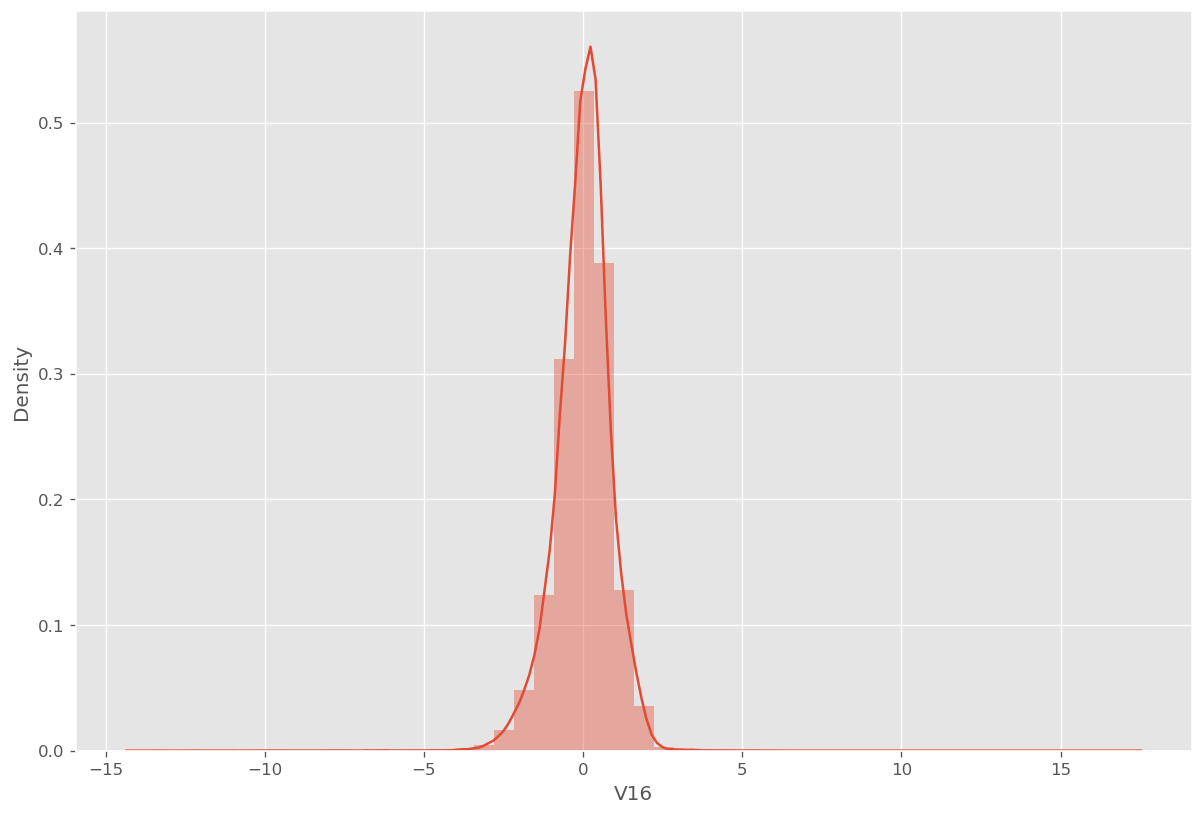

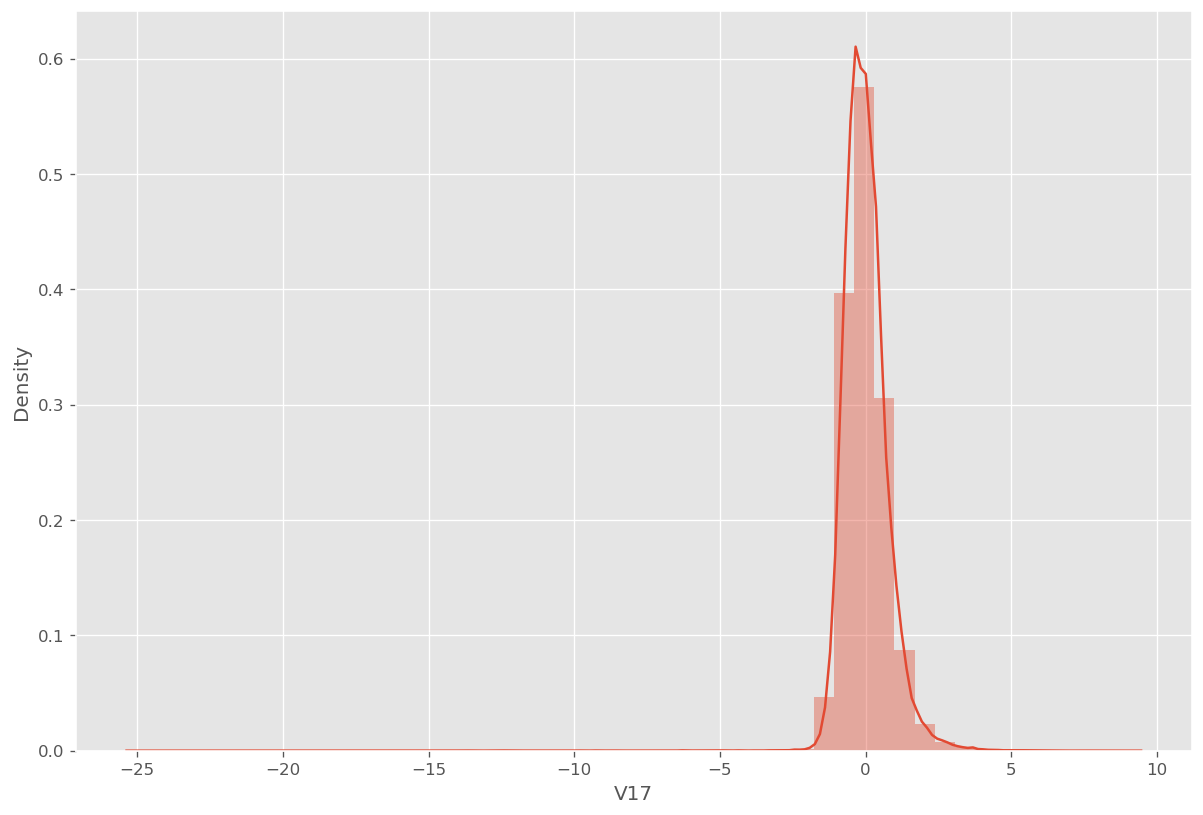

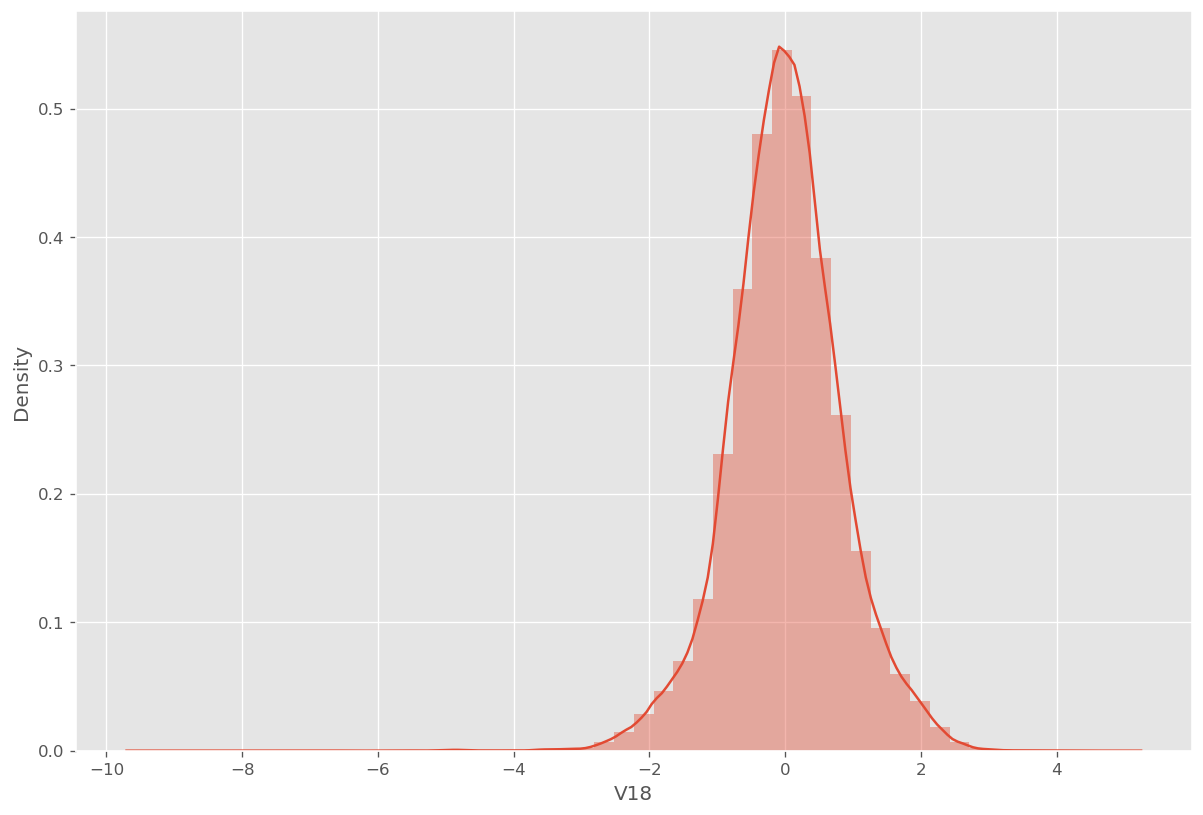

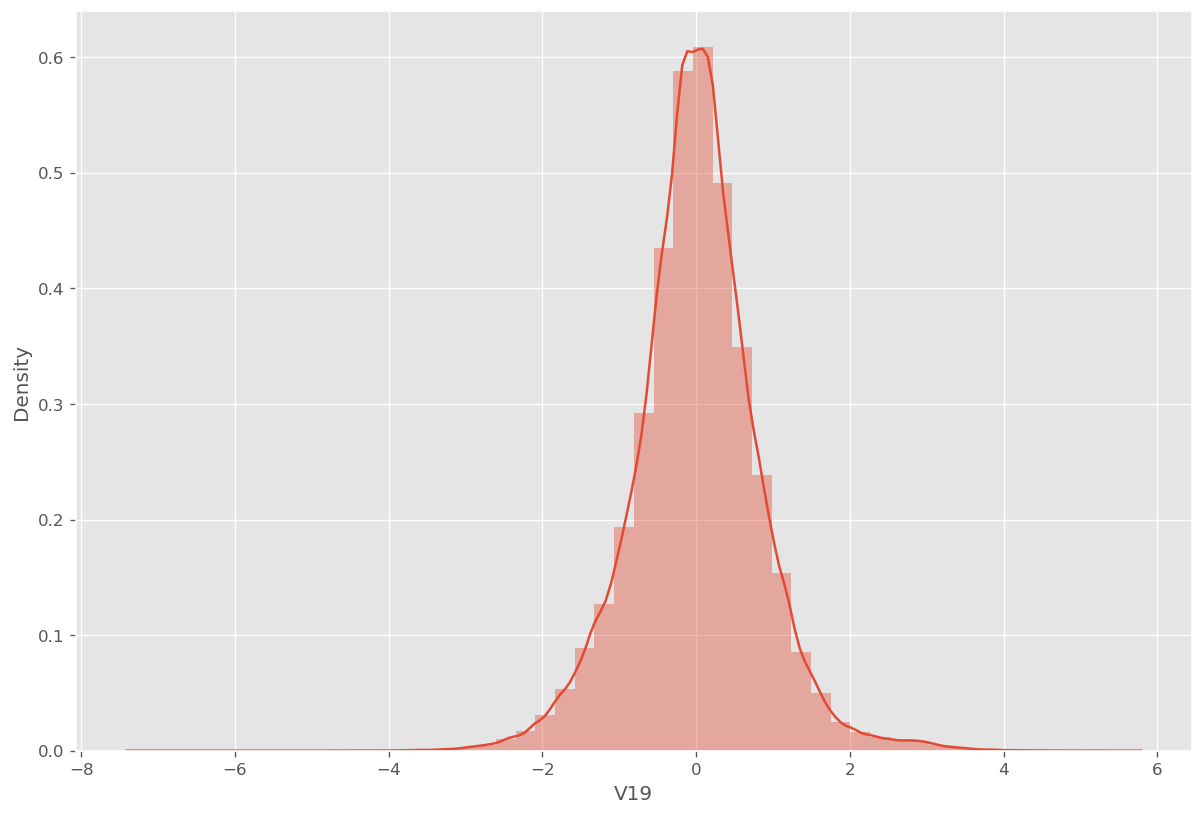

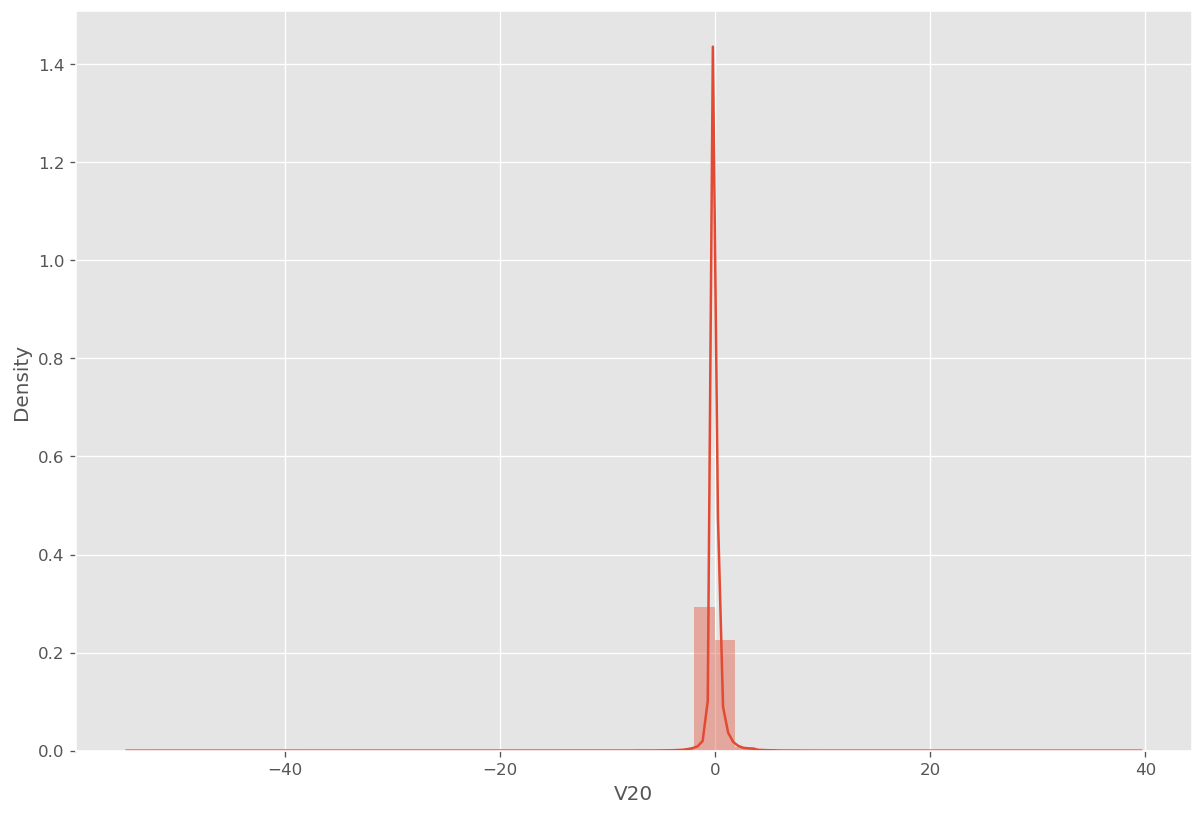

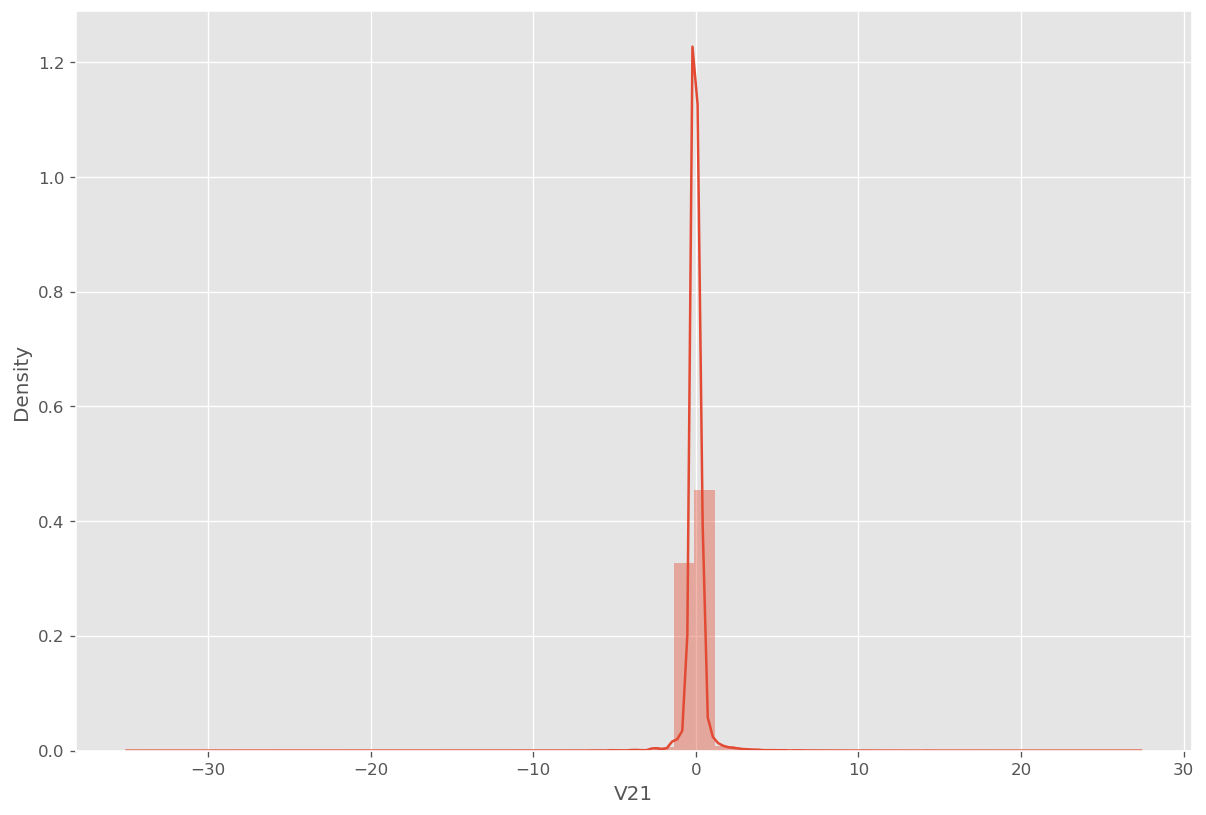

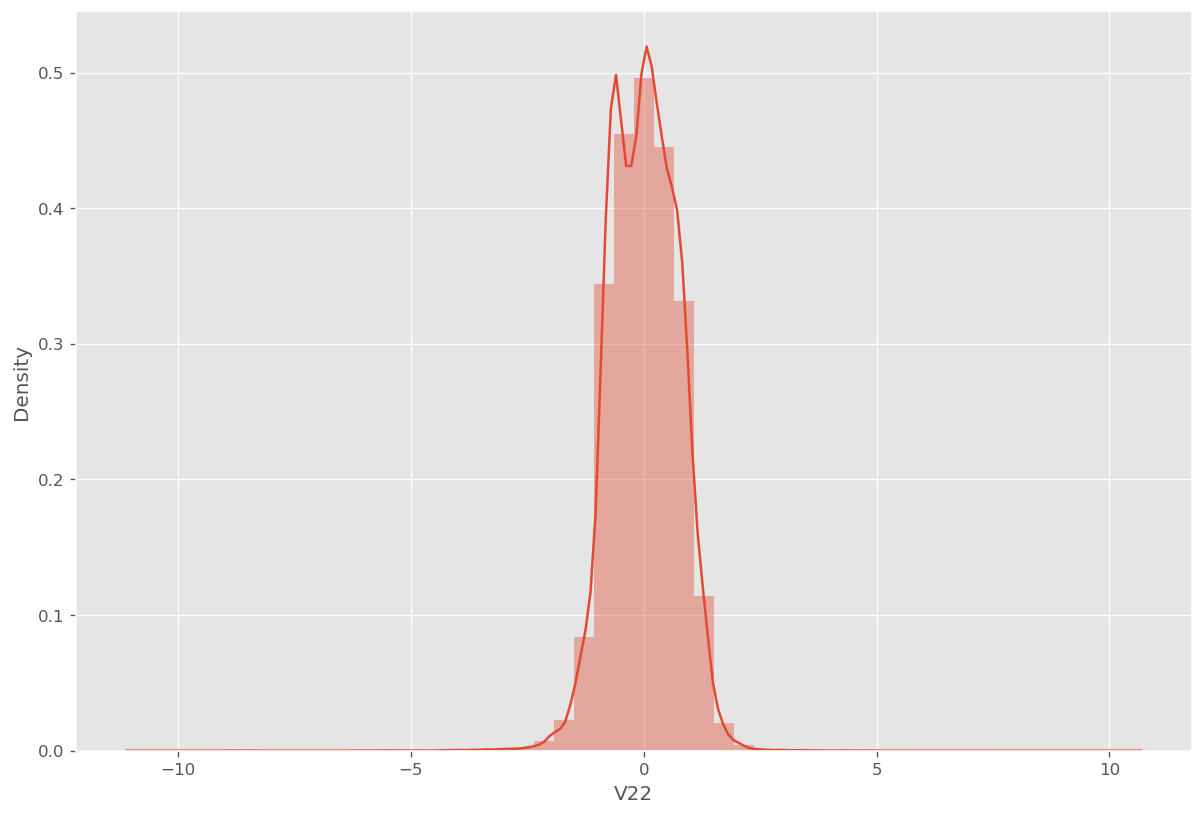

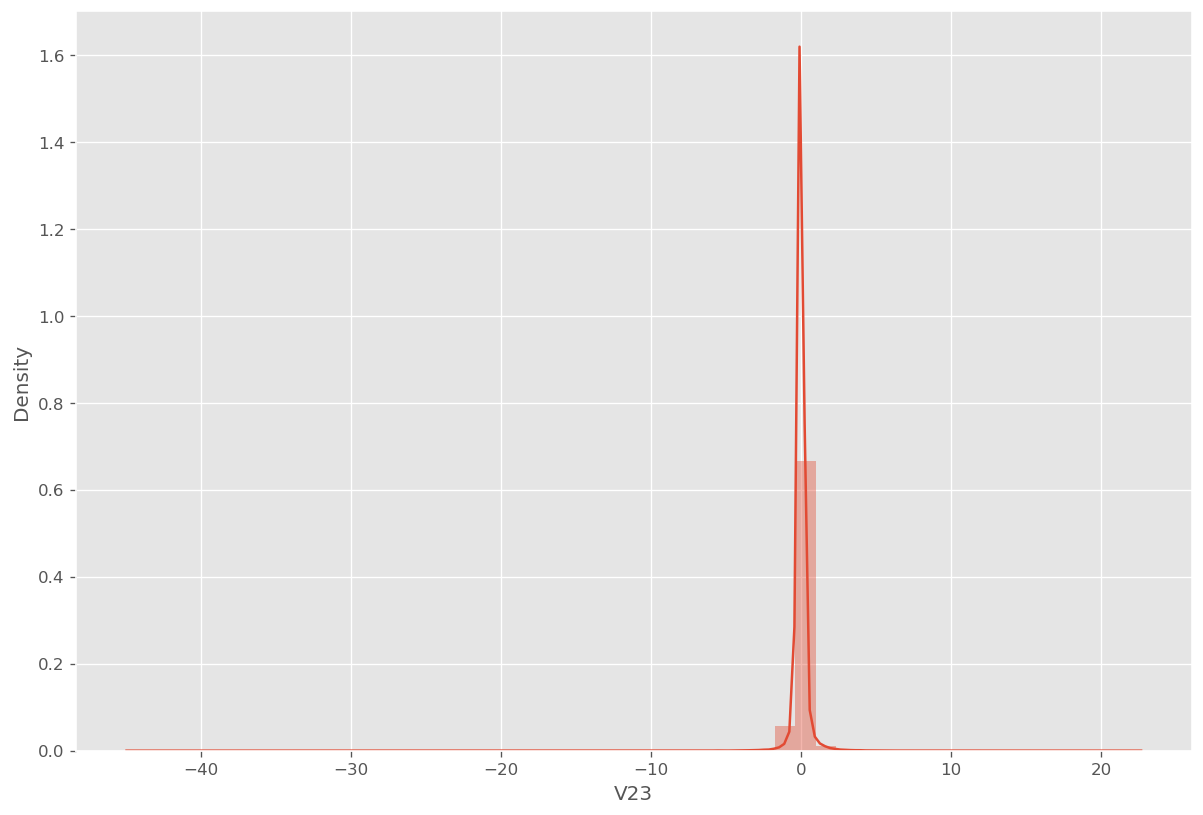

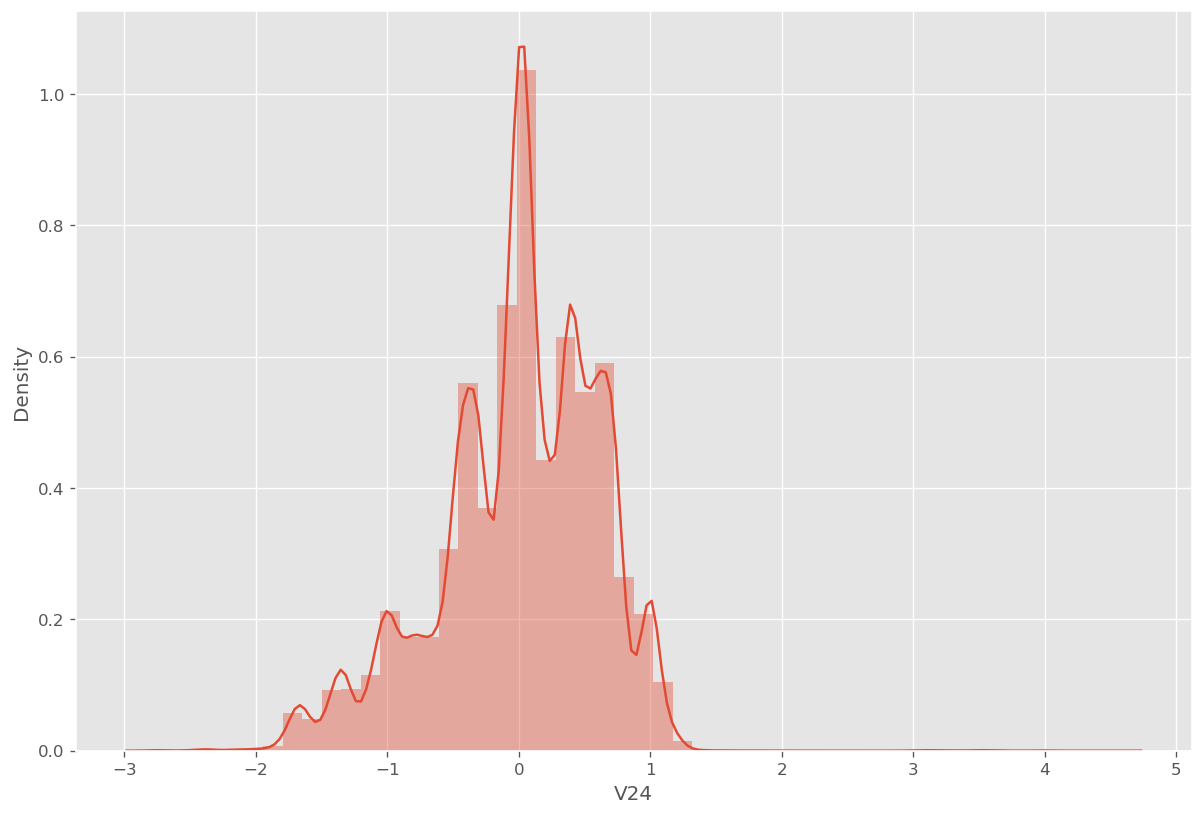

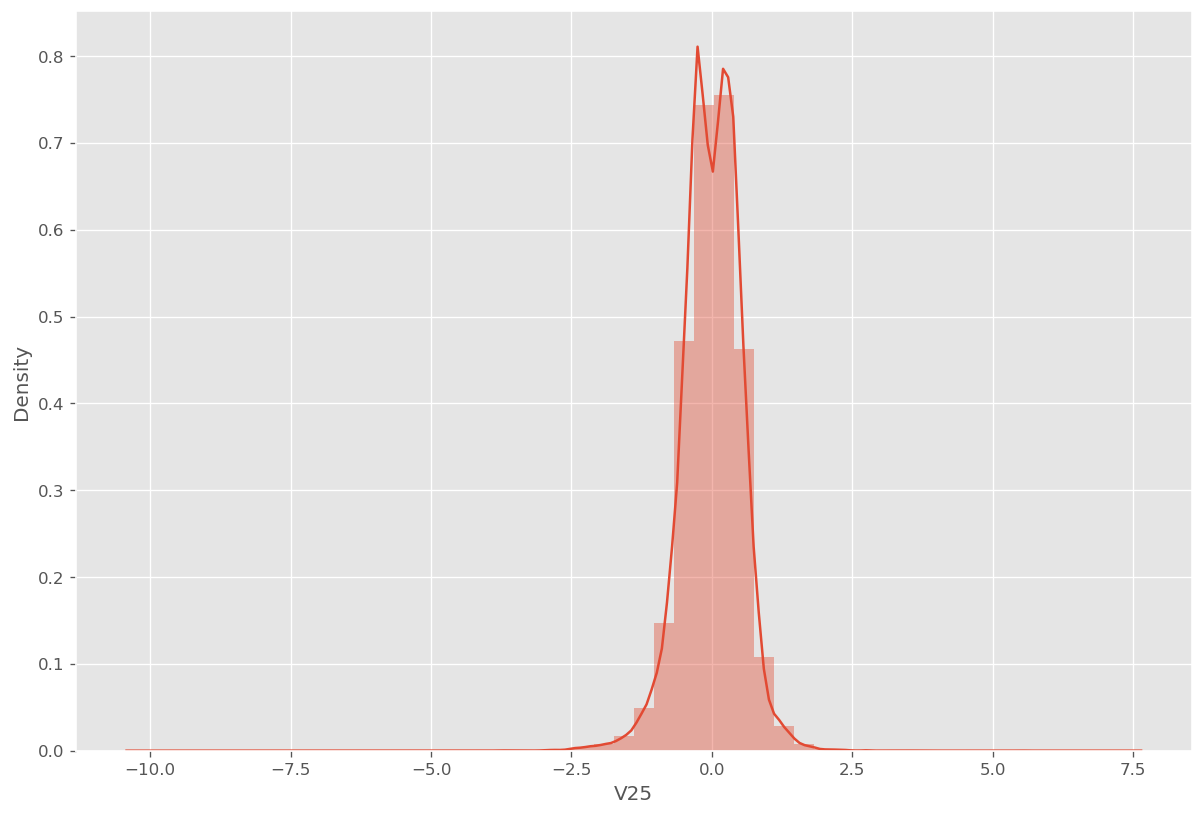

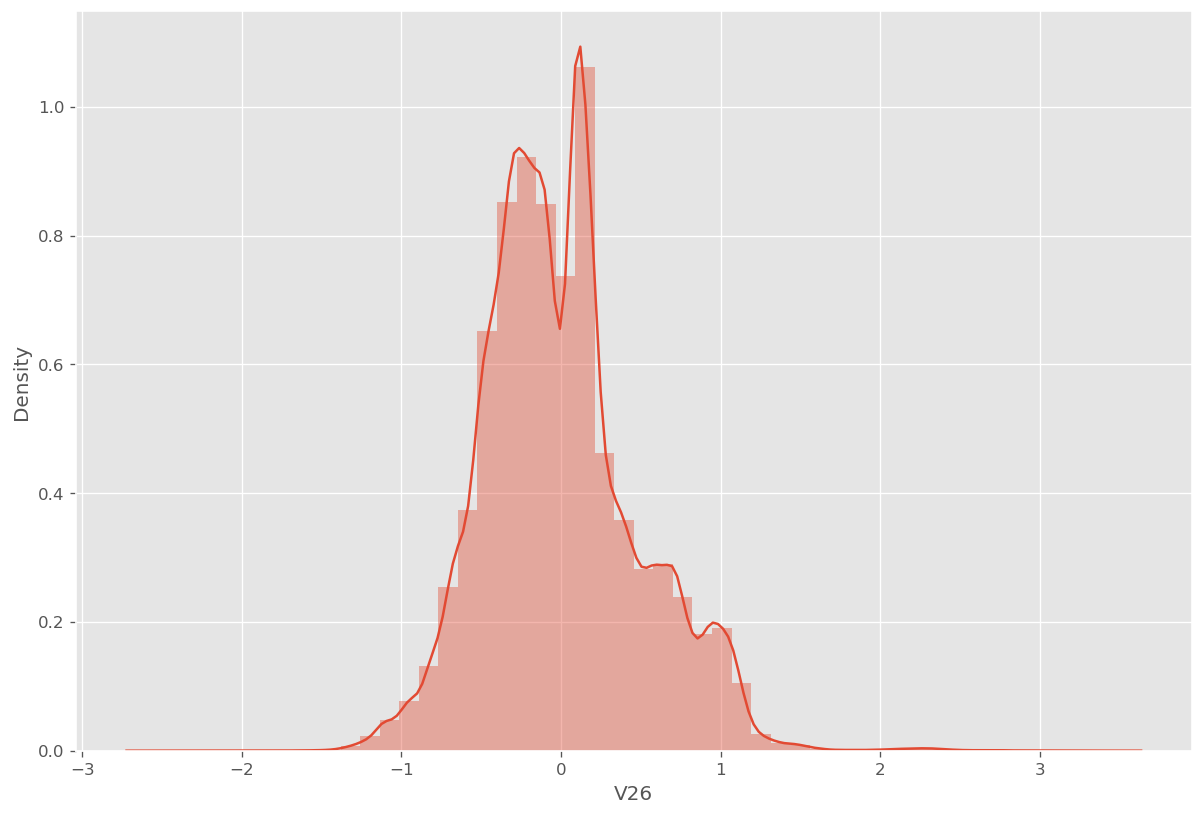

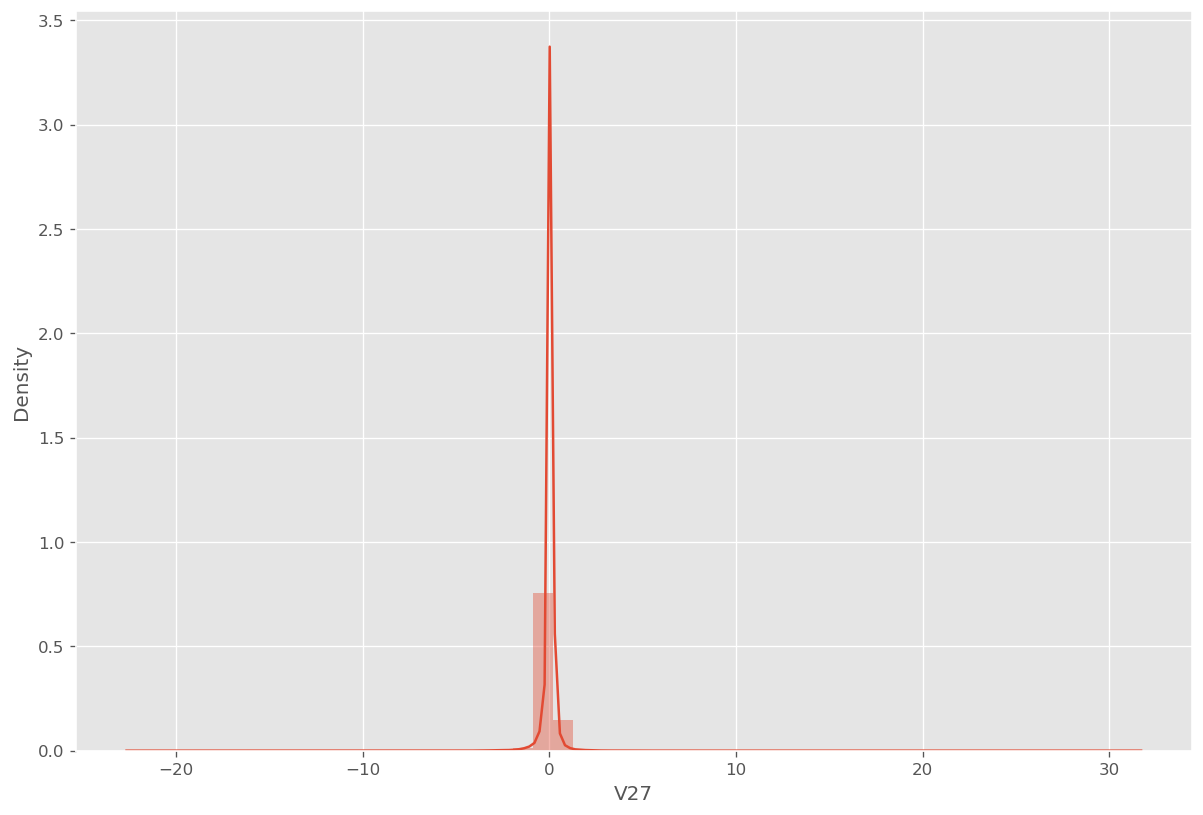

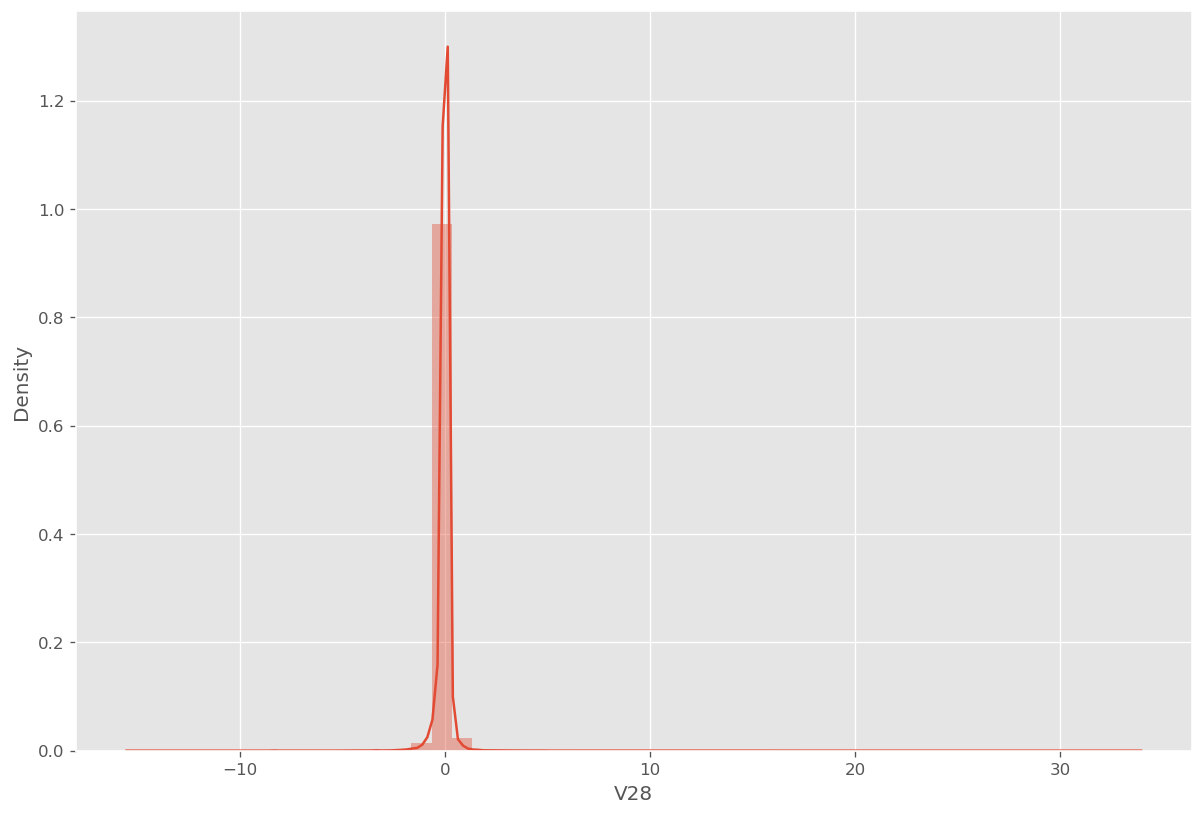

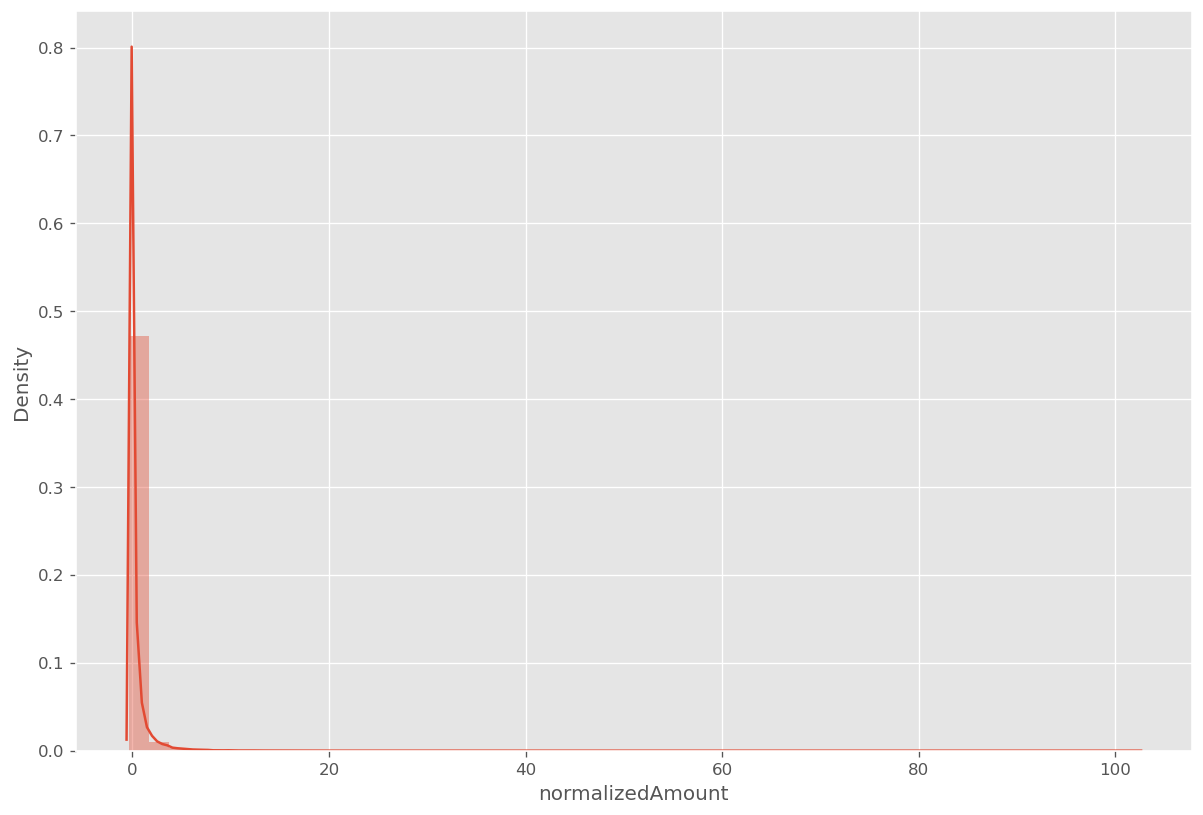

In [25]:
import warnings 
warnings.filterwarnings('ignore')

for i in num_features:
    plt.figure()
    sns.distplot(X[i])

# Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve
import matplotlib.pyplot as plt

In [99]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train.ravel())
y_pred = decision_tree.predict(X_test)

In [100]:
# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9980 	precision:0.9973 	recall:0.9988 	F1-score:0.9980


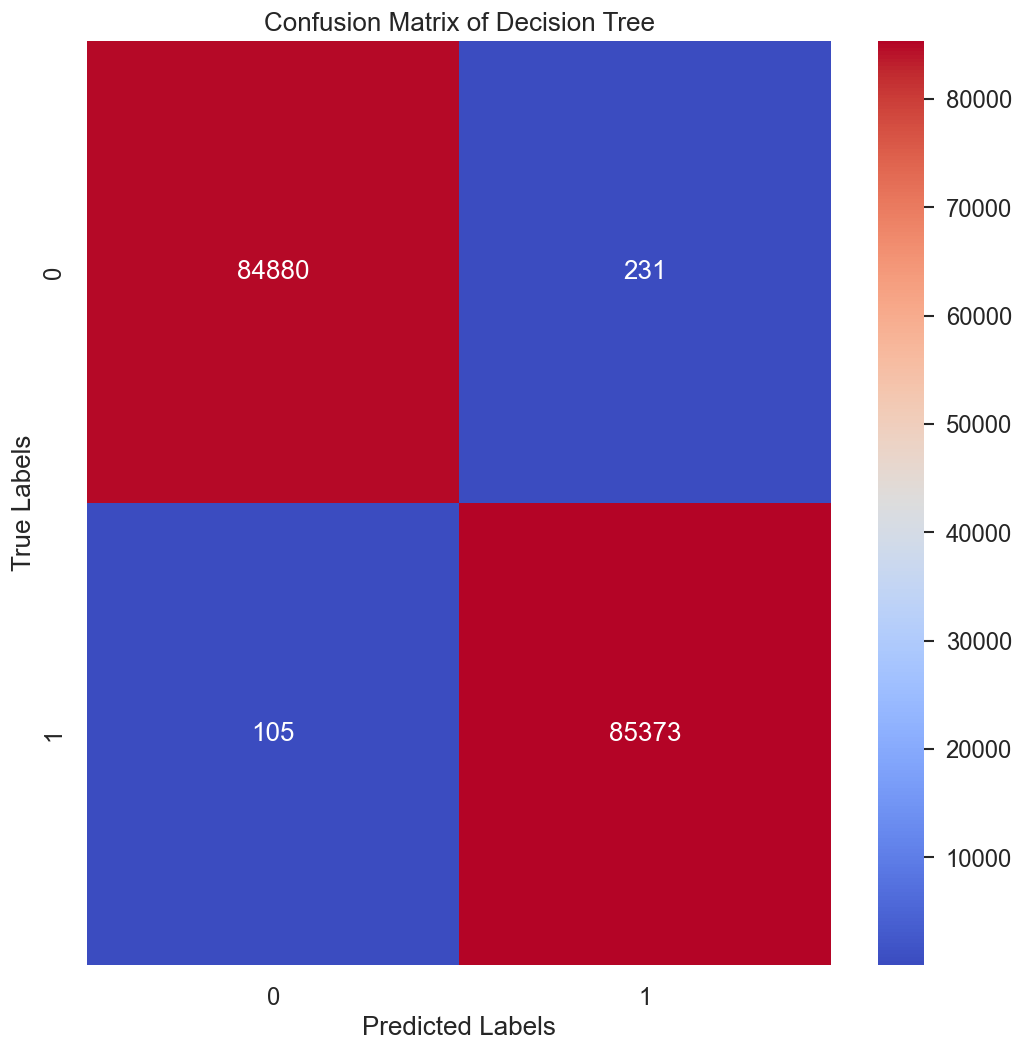

In [101]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
categories = 'auto'
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="", cmap='coolwarm', cbar=True, xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix of Decision Tree")
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [103]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['decision_tree', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

Model  Accuracy  FalseNegRate    Recall  Precision  \
0               RandomForest  0.999544      0.224490  0.775510   0.950000   
1      WeightedNeuralNetwork  0.999333      0.190476  0.809524   0.804054   
2  UnderSampledNeuralNetwork  0.993243      0.006369  0.993631   0.993631   
3   OverSampledNeuralNetwork  0.998130      0.000924  0.999076   0.997198   
4              decision_tree  0.998030      0.001228  0.998772   0.997302   

   F1 Score  
0  0.853933  
1  0.806780  
2  0.993631  
3  0.998136  
4  0.998036

In [104]:
# Evaluate on the full dataset
y_pred_full = decision_tree.predict(X)
acc_full = accuracy_score(y, y_pred_full)
prec_full = precision_score(y, y_pred_full)
rec_full = recall_score(y, y_pred_full)
f1_full = f1_score(y, y_pred_full)
print('accuracy:%0.4f'%acc_full,'\tprecision:%0.4f'%prec_full,'\trecall:%0.4f'%rec_full,'\tF1-score:%0.4f'%f1_full)

accuracy:0.9992 	precision:0.6805 	recall:1.0000 	F1-score:0.8099


In [109]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['decision_tree', acc_full, 1-rec, rec_full, prec_full, f1_full]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

Model  Accuracy  FalseNegRate    Recall  Precision  \
0               RandomForest  0.999544      0.224490  0.775510   0.950000   
1      WeightedNeuralNetwork  0.999333      0.190476  0.809524   0.804054   
2  UnderSampledNeuralNetwork  0.993243      0.006369  0.993631   0.993631   
3   OverSampledNeuralNetwork  0.998130      0.000924  0.999076   0.997198   
4              decision_tree  0.998030      0.001228  0.998772   0.997302   
5              decision_tree  0.998030      0.001228  0.998772   0.997302   
6              decision_tree  0.998030      0.001228  0.998772   0.997302   
7              decision_tree  0.999189      0.001228  1.000000   0.680498   

   F1 Score  
0  0.853933  
1  0.806780  
2  0.993631  
3  0.998136  
4  0.998036  
5  0.998036  
6  0.998036  
7  0.809877

## Implementation of Random Forest Algorithm

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
random_forest = RandomForestClassifier(n_estimators=100)

In [28]:
# Pandas Series.ravel() function returns the flattened underlying data as an ndarray.
random_forest.fit(X_train,y_train.values.ravel())    # np.ravel() Return a contiguous flattened array

RandomForestClassifier()

In [29]:
y_pred = random_forest.predict(X_test)

In [30]:
randomforest_accuracy = random_forest.score(X_test,y_test)
print("The Randomforest accuracy is : ",randomforest_accuracy)

The Randomforest accuracy is :  0.9995435553526912


In [31]:
#  plot confusion matrix 
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

confusion matrix
 [[85290     6]
 [   33   114]]


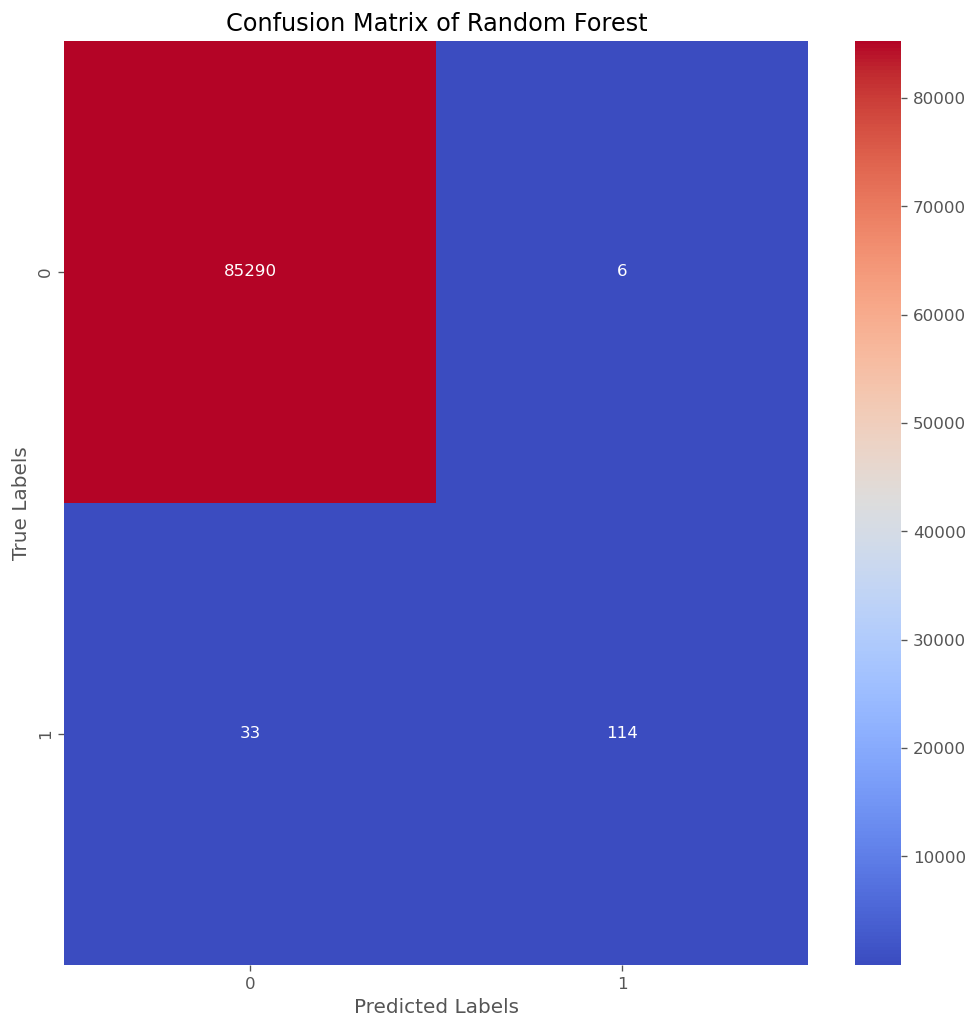

In [32]:
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix\n",cm)


categories='auto'
plt.figure(figsize=(10,10))
# sns.heatmap(cm,  annot=True, fmt="")
sns.heatmap(cm,annot=True,fmt="",cmap='coolwarm',cbar=True, xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix of Random Forest")
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show() 


In [33]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9995 	precision:0.9500 	recall:0.7755 	F1-score:0.8539


Store each model's performance in a dataframe for comparison purpose

In [34]:
### Store results in dataframe for comparing various Models
results_testset = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

Model  Accuracy  FalseNegRate   Recall  Precision  F1 Score
0  RandomForest  0.999544       0.22449  0.77551       0.95  0.853933

In [35]:
from sklearn.metrics import roc_curve

# rf_fpr = plot_roc_curve(y_test, y_pred[:,1])
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred)
print(fpr1, tpr1)
plt.show()

[0.00000000e+00 7.03432752e-05 1.00000000e+00] [0.        0.7755102 1.       ]


Run the models on the full dataset to check.

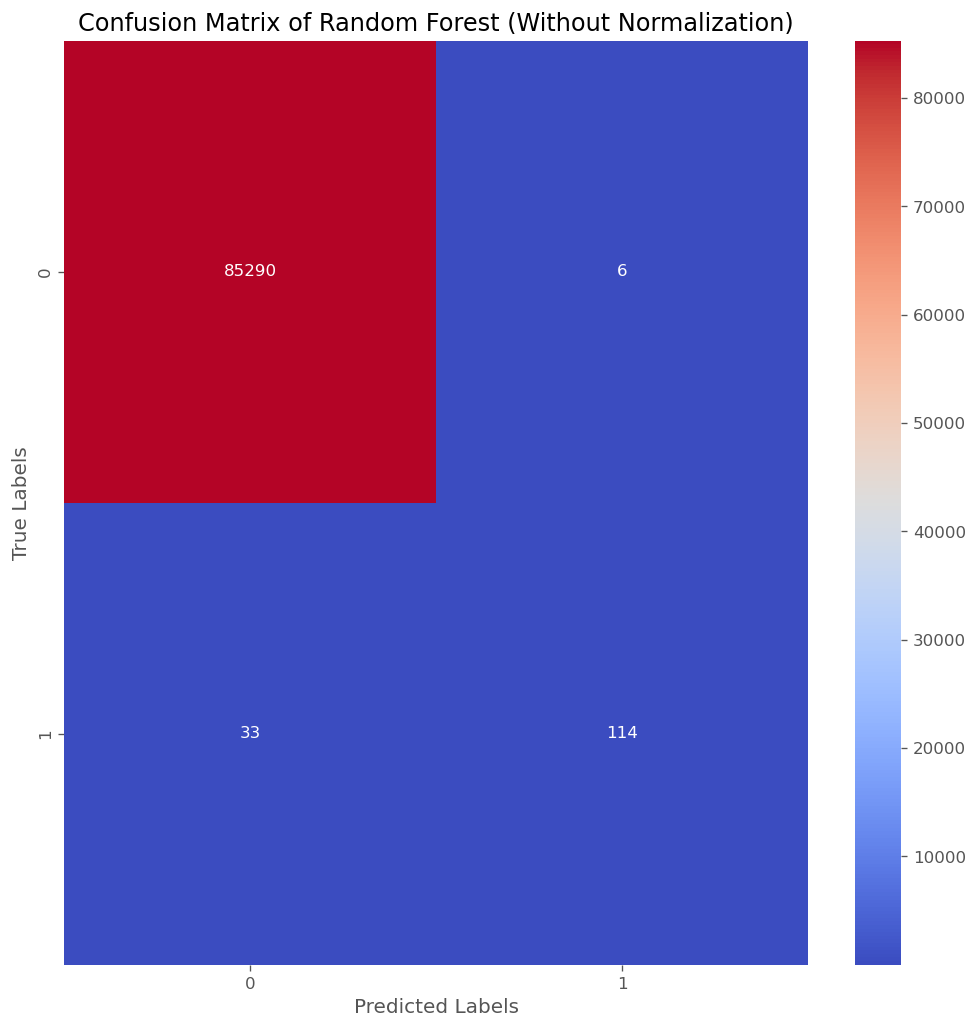

In [36]:
# Confusion matrix on the whole dataset
y_pred = random_forest.predict(X)
# cnf_matrix = confusion_matrix(y,y_pred.round())
# plot_confusion_matrix(cnf_matrix,classes=[0,1])

# cm=confusion_matrix(y_test,y_pred)
# print("confusion matrix\n",cm)


categories='auto'
plt.figure(figsize=(10,10))
# sns.heatmap(cm,  annot=True, fmt="")
sns.heatmap(cm,annot=True,fmt="",cmap='coolwarm',cbar=True, xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix of Random Forest (Without Normalization)")
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show() 


In [37]:
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9999 	precision:0.9871 	recall:0.9309 	F1-score:0.9582


In [38]:
results_fullset = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset

Model  Accuracy  FalseNegRate    Recall  Precision  F1 Score
0  RandomForest   0.99986      0.069106  0.930894   0.987069  0.958159

In [39]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [41]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2113 (8.25 KB)
Trainable params: 2113 (8.2

## Training of RF Model

In [43]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
13291/13291 [==============================] - 20s 1ms/step - loss: 0.0110 - accuracy: 0.9974
Epoch 2/5
13291/13291 [==============================] - 19s 1ms/step - loss: 0.0038 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 18s 1ms/step - loss: 0.0035 - accuracy: 0.9993
Epoch 4/5
13291/13291 [==============================] - 18s 1ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 5/5
13291/13291 [==============================] - 19s 1ms/step - loss: 0.0032 - accuracy: 0.9994


In [44]:
RandomForest_Score = model.evaluate(X_test, y_test)

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0040 - accuracy: 0.9993


In [45]:
print("The RandomForest Score : ", RandomForest_Score)

The RandomForest Score :  [0.004042303655296564, 0.9993329048156738]


2671/2671 [==============================] - 3s 992us/step
Test Data Accuracy: 0.9993


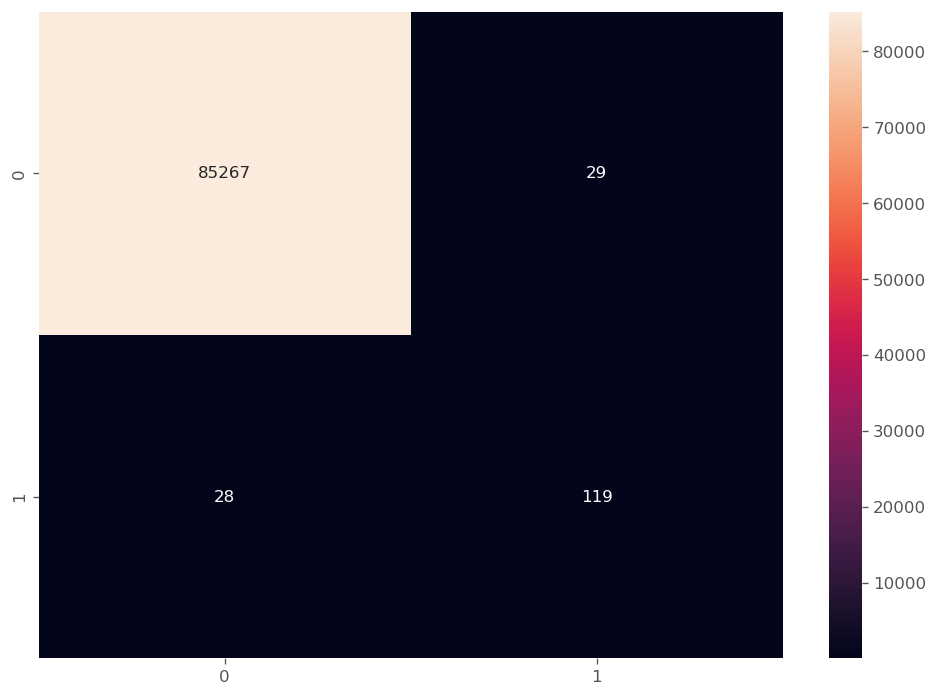

In [46]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### Implementing the SMOTE  Methodology on the Models

In [47]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_resample, y_resample = oversample.fit_resample(X, y)
# X_resample, y_resample

In [48]:
print('Number of total transactions before SMOTE upsampling: ', len(y), '...after SMOTE upsampling: ', len(y_resample))
print('Number of fraudulent transactions before SMOTE upsampling: ', len(y[y.Class==1]), 
      '...after SMOTE upsampling: ', np.sum(y_resample[y_resample==1]))

Number of total transactions before SMOTE upsampling:  284807 ...after SMOTE upsampling:  568630
Number of fraudulent transactions before SMOTE upsampling:  492 ...after SMOTE upsampling:  Class    284315.0
dtype: float64


In [49]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [50]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [52]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [53]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [54]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
26537/26537 [==============================] - 38s 1ms/step - loss: 0.0485 - accuracy: 0.9820
Epoch 2/5
26537/26537 [==============================] - 37s 1ms/step - loss: 0.0195 - accuracy: 0.9945
Epoch 3/5
26537/26537 [==============================] - 37s 1ms/step - loss: 0.0148 - accuracy: 0.9961
Epoch 4/5
26537/26537 [==============================] - 38s 1ms/step - loss: 0.0127 - accuracy: 0.9968
Epoch 5/5
26537/26537 [==============================] - 37s 1ms/step - loss: 0.0114 - accuracy: 0.9972


In [55]:
# y_pred = model.predict(X_test)
# y_expected = pd.DataFrame(y_test)
# cnf_matrix = confusion_matrix(y_expected, y_pred.round())
# plot_confusion_matrix(cnf_matrix, classes=[0,1])
# plt.show()

5331/5331 [==============================] - 5s 987us/step
SMOTE Test Data Accuracy: 0.9974


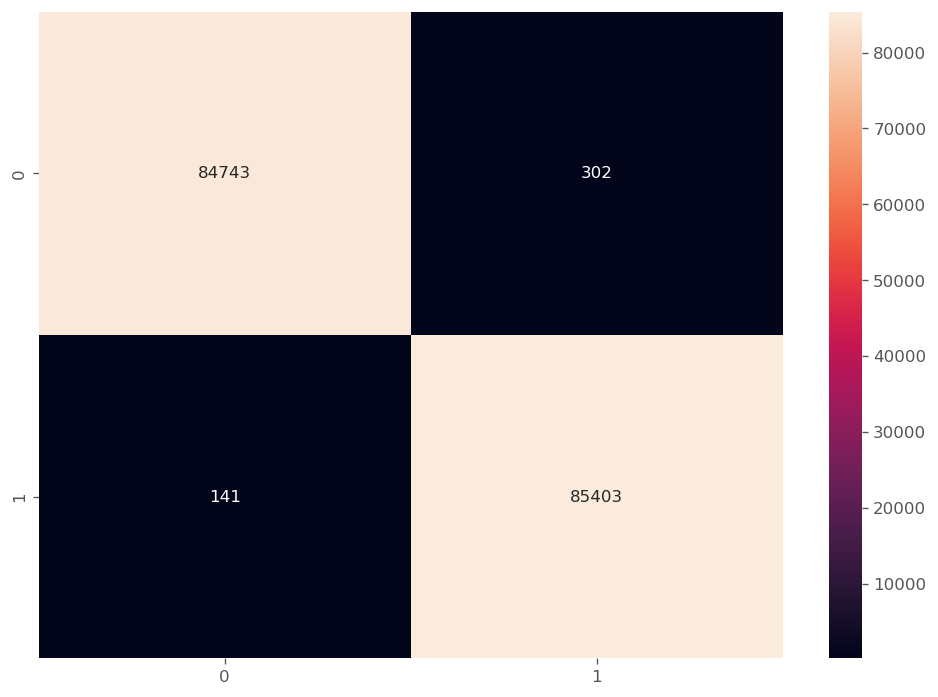

In [56]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("SMOTE Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [57]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['WeightedNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

Model  Accuracy  FalseNegRate    Recall  Precision  \
0           RandomForest  0.999544      0.224490  0.775510   0.950000   
1  WeightedNeuralNetwork  0.999333      0.190476  0.809524   0.804054   

   F1 Score  
0  0.853933  
1  0.806780

8901/8901 [==============================] - 9s 1ms/step
Confusion matrix, without normalization
[[283394    921]
 [     4    488]]


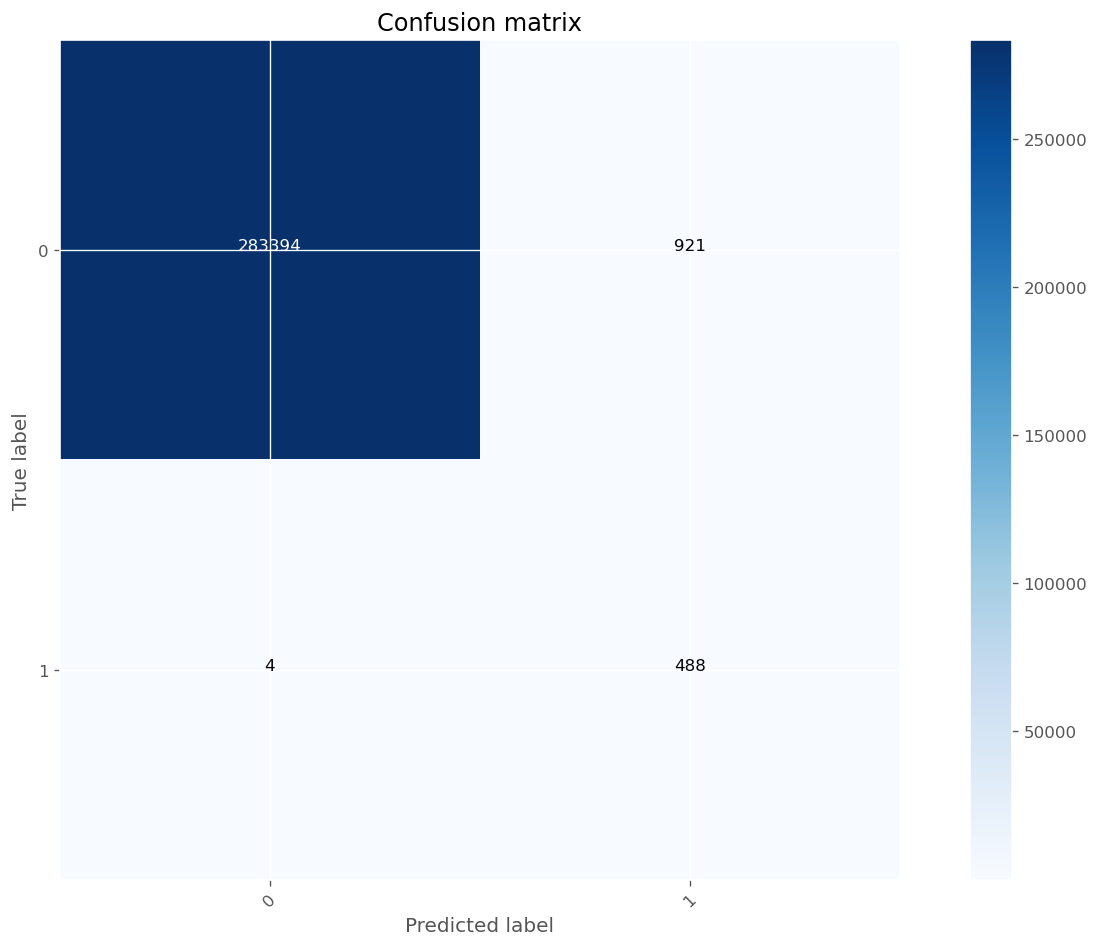

In [58]:
# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [59]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

In [60]:
model_results = pd.DataFrame([['WeightedNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

Model  Accuracy  FalseNegRate    Recall  Precision  \
0           RandomForest  0.999860      0.069106  0.930894   0.987069   
1  WeightedNeuralNetwork  0.996752      0.008130  0.991870   0.346345   

   F1 Score  
0  0.958159  
1  0.513414

### WeightedNeuralNetwork ROC Values

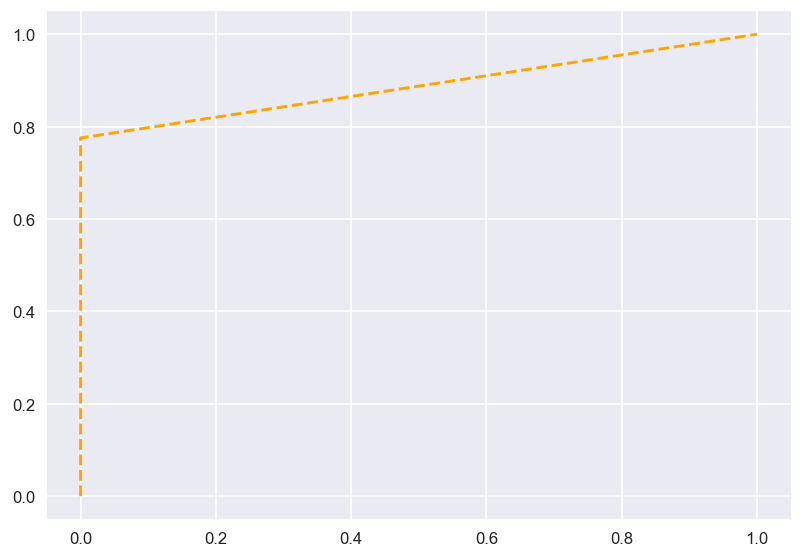

In [61]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

In [62]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [63]:
normal_indices = data[data.Class == 0].index

In [64]:
len(normal_indices)

284315

In [65]:
# Random select N indices from non fraudulent samples (N equals to number of fraudulent records)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [66]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [67]:
under_sample_data = data.iloc[under_sample_indices,:]

In [68]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)

In [70]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                480       
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 24)                600       
                                                                 
 dense_8 (Dense)             (None, 24)                600       
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2113 (8.25 KB)
Trainable params: 2113 (8

In [72]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
46/46 [==============================] - 1s 2ms/step - loss: 0.0397 - accuracy: 0.9913
Epoch 2/5
46/46 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 0.9956
Epoch 3/5
46/46 [==============================] - 0s 1ms/step - loss: 0.0150 - accuracy: 0.9971
Epoch 4/5
46/46 [==============================] - 0s 1ms/step - loss: 0.0136 - accuracy: 0.9971
Epoch 5/5
46/46 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9956


10/10 [==============================] - 0s 2ms/step
Confusion matrix, without normalization
[[138   1]
 [  1 156]]


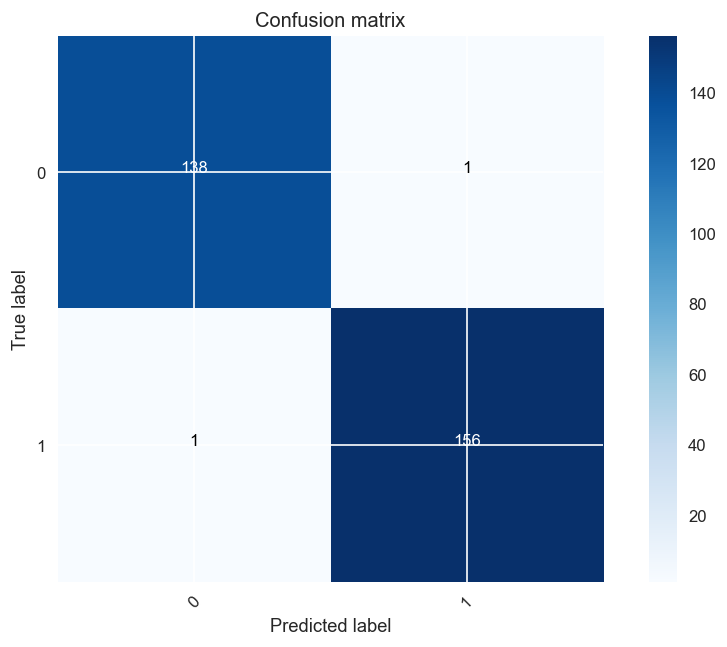

In [73]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

- The metrics look pretty strong on the test set....

### Under Sampled NeuralNetwork

In [74]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [75]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['UnderSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

Model  Accuracy  FalseNegRate    Recall  Precision  \
0               RandomForest  0.999544      0.224490  0.775510   0.950000   
1      WeightedNeuralNetwork  0.999333      0.190476  0.809524   0.804054   
2  UnderSampledNeuralNetwork  0.993243      0.006369  0.993631   0.993631   

   F1 Score  
0  0.853933  
1  0.806780  
2  0.993631

8901/8901 [==============================] - 9s 1ms/step
Confusion matrix, without normalization
[[283326    989]
 [     1    491]]


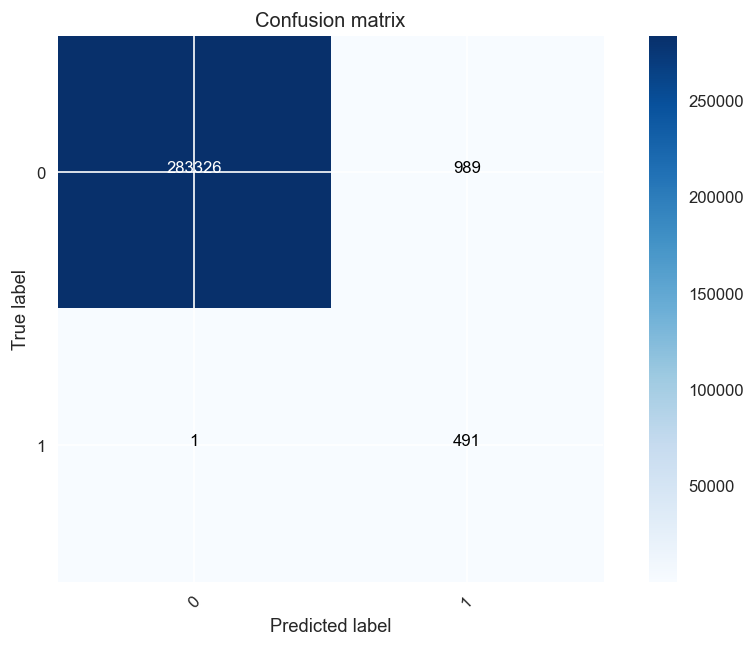

In [76]:
# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [77]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

In [78]:
model_results = pd.DataFrame([['UnderSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

Model  Accuracy  FalseNegRate    Recall  Precision  \
0               RandomForest  0.999860      0.069106  0.930894   0.987069   
1      WeightedNeuralNetwork  0.996752      0.008130  0.991870   0.346345   
2  UnderSampledNeuralNetwork  0.996524      0.002033  0.997967   0.331757   

   F1 Score  
0  0.958159  
1  0.513414  
2  0.497972

In [79]:
# !pip install -U imbalanced-learn

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
y_resample

Class
0           0
1           0
2           0
3           0
4           0
...       ...
568625      1
568626      1
568627      1
568628      1
568629      1

[568630 rows x 1 columns]

In [82]:
print('Number of total transactions before SMOTE upsampling: ', len(y), '...after SMOTE upsampling: ', len(y_resample))
print('Number of fraudulent transactions before SMOTE upsampling: ', len(y[y.Class==1]), 
      '...after SMOTE upsampling: ', np.sum(y_resample[y_resample==1]))

Number of total transactions before SMOTE upsampling:  284807 ...after SMOTE upsampling:  568630
Number of fraudulent transactions before SMOTE upsampling:  492 ...after SMOTE upsampling:  Class    284315.0
dtype: float64


In [83]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [85]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [86]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [87]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
26537/26537 [==============================] - 38s 1ms/step - loss: 0.0480 - accuracy: 0.9825
Epoch 2/5
26537/26537 [==============================] - 37s 1ms/step - loss: 0.0196 - accuracy: 0.9944
Epoch 3/5
26537/26537 [==============================] - 37s 1ms/step - loss: 0.0152 - accuracy: 0.9960
Epoch 4/5
26537/26537 [==============================] - 38s 1ms/step - loss: 0.0134 - accuracy: 0.9965
Epoch 5/5
26537/26537 [==============================] - 37s 1ms/step - loss: 0.0117 - accuracy: 0.9972


5331/5331 [==============================] - 5s 1ms/step
Confusion matrix, without normalization
[[84871   240]
 [   79 85399]]


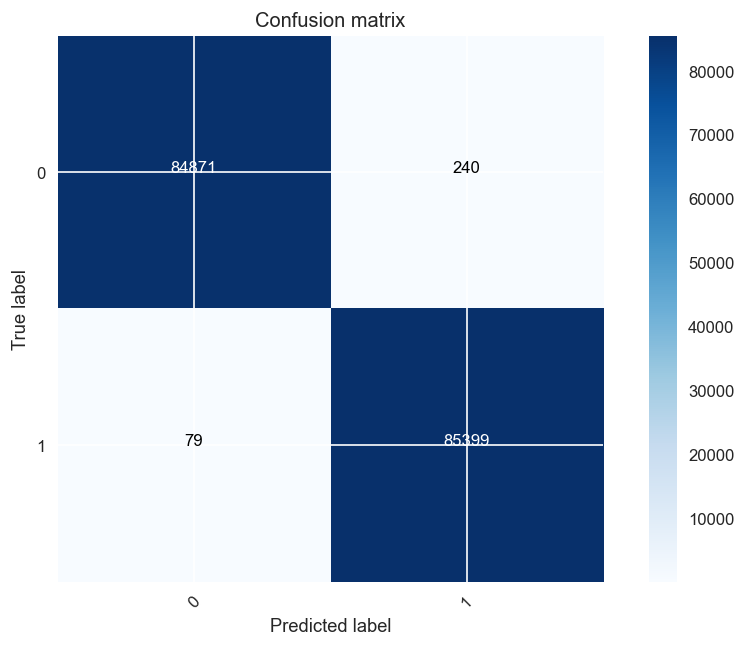

In [88]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

### Over Sampled NeuralNetwork

In [89]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [90]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['OverSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

Model  Accuracy  FalseNegRate    Recall  Precision  \
0               RandomForest  0.999544      0.224490  0.775510   0.950000   
1      WeightedNeuralNetwork  0.999333      0.190476  0.809524   0.804054   
2  UnderSampledNeuralNetwork  0.993243      0.006369  0.993631   0.993631   
3   OverSampledNeuralNetwork  0.998130      0.000924  0.999076   0.997198   

   F1 Score  
0  0.853933  
1  0.806780  
2  0.993631  
3  0.998136

8901/8901 [==============================] - 9s 969us/step
Confusion matrix, without normalization
[[283546    769]
 [     5    487]]


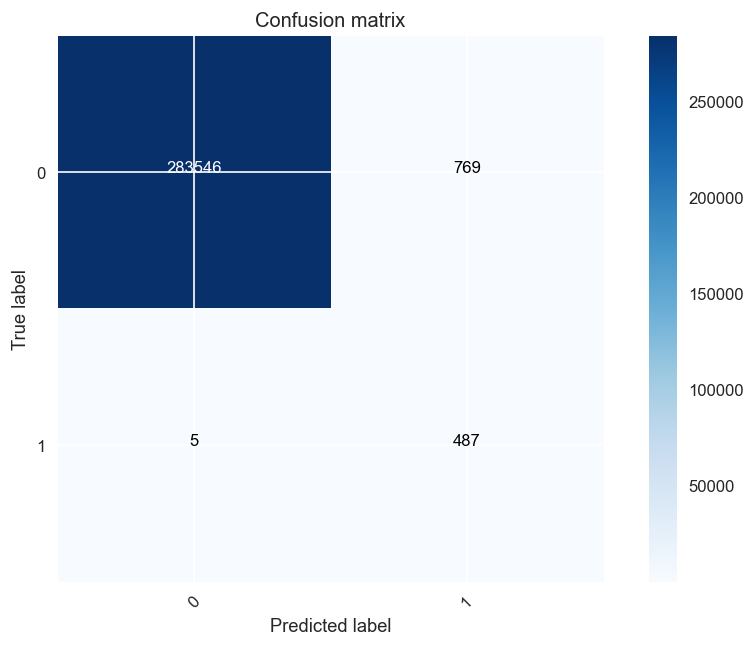

In [91]:
# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [92]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

In [93]:
model_results = pd.DataFrame([['OverSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

Model  Accuracy  FalseNegRate    Recall  Precision  \
0               RandomForest  0.999860      0.069106  0.930894   0.987069   
1      WeightedNeuralNetwork  0.996752      0.008130  0.991870   0.346345   
2  UnderSampledNeuralNetwork  0.996524      0.002033  0.997967   0.331757   
3   OverSampledNeuralNetwork  0.997282      0.010163  0.989837   0.387739   

   F1 Score  
0  0.958159  
1  0.513414  
2  0.497972  
3  0.557208

Text(0.5, 0, 'Mertics')

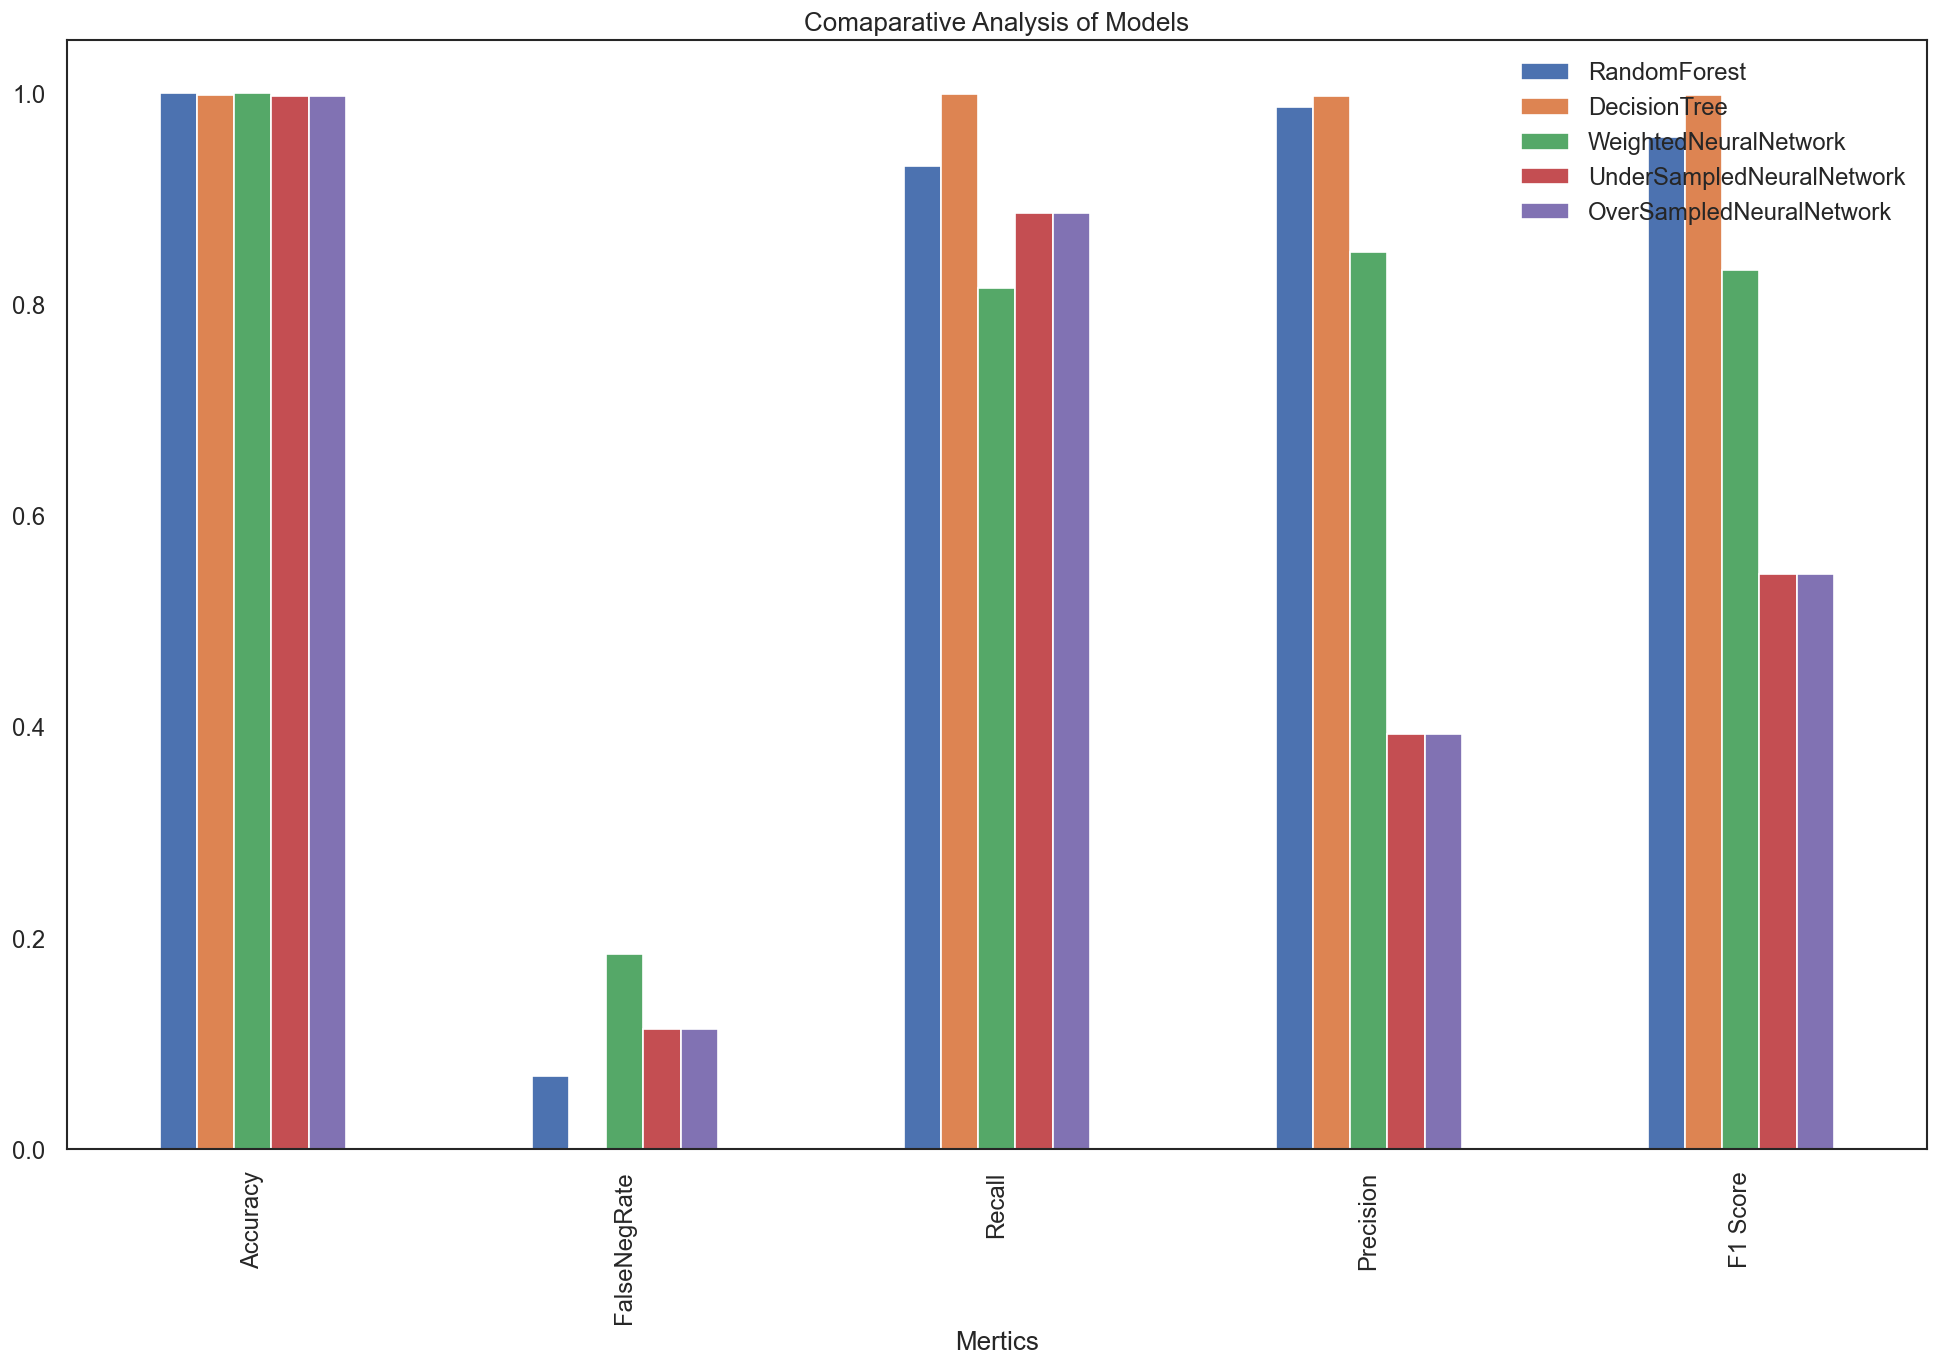

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

plotdata = pd.DataFrame({

    "RandomForest":[0.999860,0.069106,0.930894,0.987069,0.958159],
    "DecisionTree":[0.998030,0.001228,0.998772,0.997302,0.998036],

    "WeightedNeuralNetwork":[0.999431,0.184959,0.815041,0.849576,0.831950],

    "UnderSampledNeuralNetwork":[0.997437,0.113821,0.886179,0.392793,0.544320],
    
    "OverSampledNeuralNetwork":[0.997437,0.113821,0.886179,0.392793,0.544320]
    },

    index=["Accuracy", "FalseNegRate", "Recall", "Precision", "F1 Score"])

plotdata.plot(kind="bar",figsize=(20, 12))

plt.title("Comaparative Analysis of Models")

plt.xlabel("Mertics")

### ROC curves for different test datasets


NameError: name 'DecisonTree' is not defined

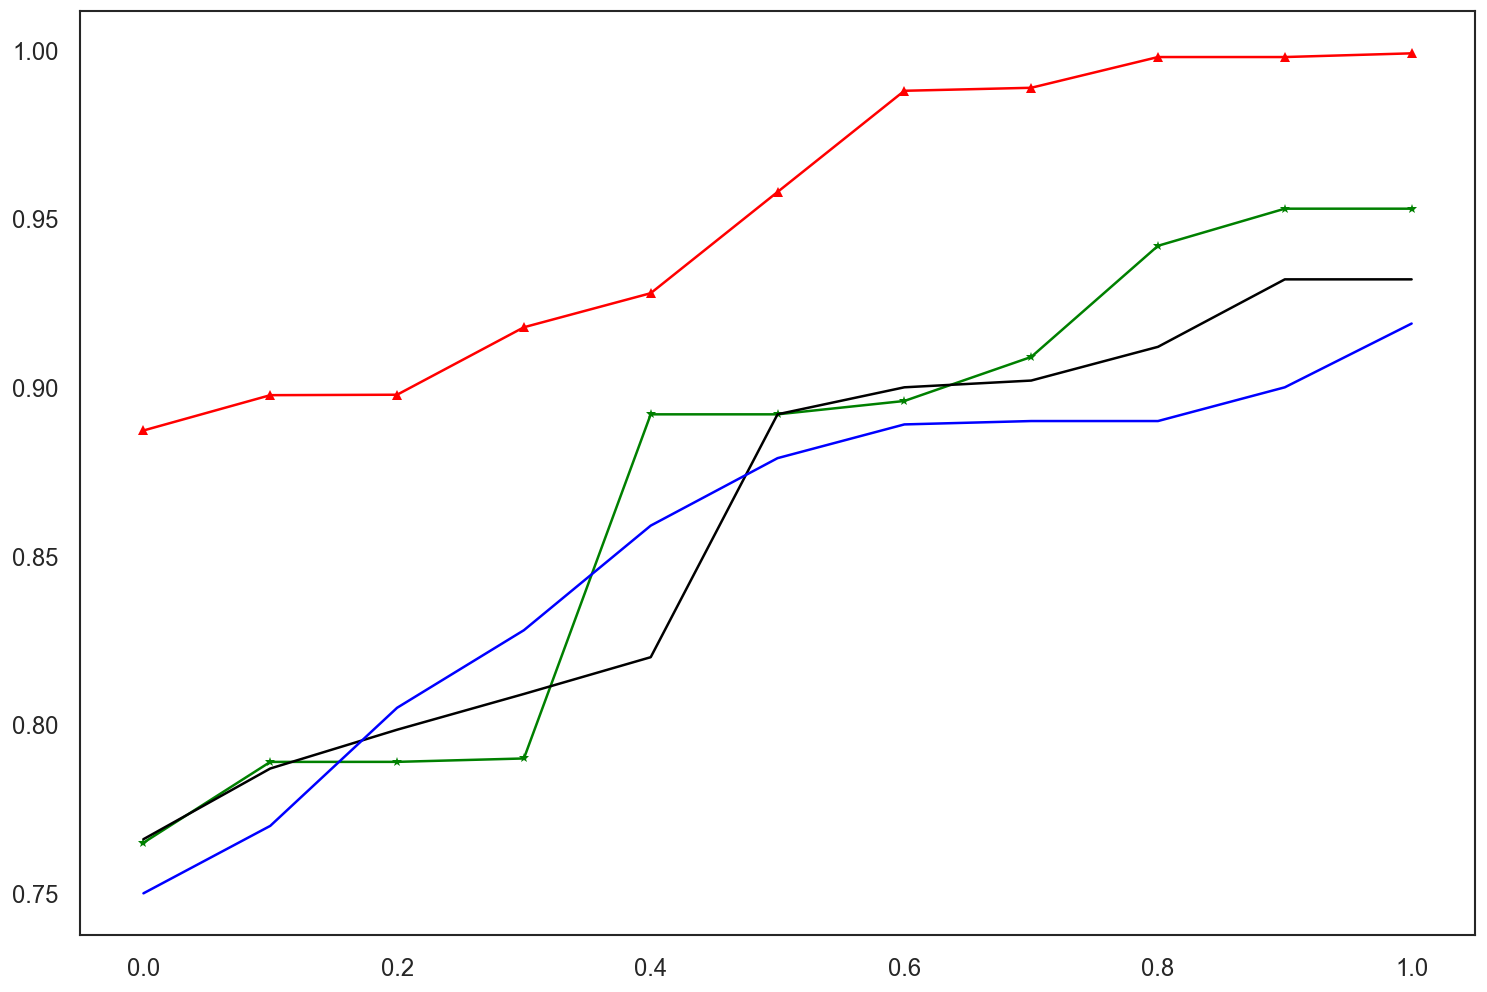

In [118]:
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np 
 
#'ROC Curve'
sns.set(font_scale=1.3, style='white')
fig, ax = plt.subplots(figsize =(15, 10))

xaxis = [ 0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00]                                                                                                                                                                                            ; RandomForest= [0.75, 0.77, 0.805, 0.828, 0.859, 0.879, 0.889, 0.89, 0.89, 0.90, 0.9189 ]; WeightedNeuralNetwork= [0.76605, 0.787, 0.7985, 0.8091, 0.82, 0.892, 0.90, 0.902, 0.912, 0.932, 0.932]; UnderSampledNeuralNetwork= [0.765, 0.78896, 0.78897, 0.78998, 0.89199, 0.89199,0.89595, 0.908995, 0.94195, 0.95295, 0.95295]; OverSampledNeuralNetwork= [0.8872, 0.89767, 0.8978, 0.9178, 0.9279, 0.9579,0.9879, 0.98879, 0.9979, 0.9979, 0.999 ]                                                                                                            

plt.plot(xaxis,OverSampledNeuralNetwork, label='OverSampledNeuralNetwork', color='red', marker='^')

plt.plot(xaxis,UnderSampledNeuralNetwork, label='UnderSampledNeuralNetwork', color='green', marker='*')

plt.plot(xaxis, WeightedNeuralNetwork, label='WeightedNeuralNetwork', color='black', marker='+')

plt.plot(xaxis, RandomForest, label='Random Forest', color='blue', marker='x')
plt.plot(xaxis, DecisonTree, label='DecisonTree', color='pink', marker='+')



plt.title('ROC curves for different DL Algos')
plt.ylabel('True-Positive Rate(TPR)')
plt.xlabel('False-Positive Rate(FPR)')
plt.legend()
plt.show()